In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('rainfall in india 1901-2015.csv')

print(df.shape)
print(df.dtypes)


(4116, 19)
SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object


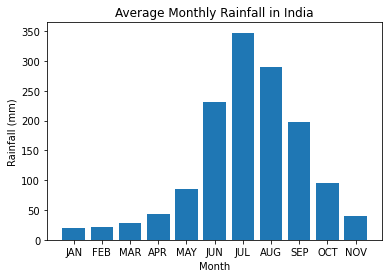

In [ ]:
# Calculate the average rainfall for each month
monthly_means = df.iloc[:, 2:13].mean()

# Create a bar chart to visualize the results
plt.bar(monthly_means.index, monthly_means.values)

# Set the plot title and axes labels
plt.title('Average Monthly Rainfall in India')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')

# Show the plot
plt.show()


From above we can conclude that most rainfall occurs in the month of "JULY".

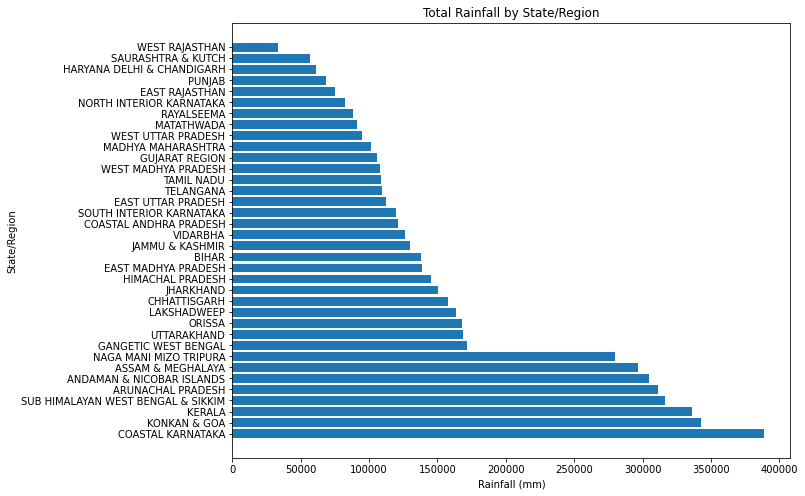

In [ ]:
# Calculate the total rainfall for each state/region
region_rainfall = df.groupby('SUBDIVISION')['ANNUAL'].sum()

# Sort the results in descending order
sorted_rainfall = region_rainfall.sort_values(ascending=False)

# Create a horizontal bar chart to visualize the results
fig, ax = plt.subplots(figsize=(10, 8))  # Increase the figure size
ax.barh(sorted_rainfall.index, sorted_rainfall.values)

# Set the plot title and axes labels
ax.set_title('Total Rainfall by State/Region')
ax.set_xlabel('Rainfall (mm)')
ax.set_ylabel('State/Region')

# Show the plot
plt.show()

By using the "BAR graph" plotted above we can see that Coastal Karnataka has the highest Rainfall.

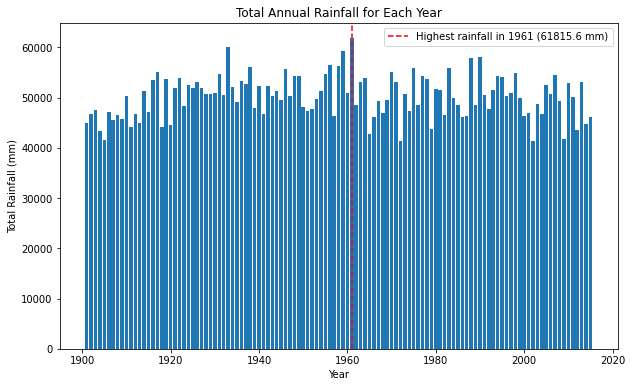

In [ ]:
# Calculate the total rainfall for each year
yearly_rainfall = df.groupby('YEAR')['ANNUAL'].sum()

# Find the year with the highest rainfall
max_rainfall_year = yearly_rainfall.idxmax()
max_rainfall = yearly_rainfall[max_rainfall_year]

# Create a bar plot of the total rainfall for each year
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(yearly_rainfall.index, yearly_rainfall.values)
ax.set_xlabel('Year')
ax.set_ylabel('Total Rainfall (mm)')
ax.set_title('Total Annual Rainfall for Each Year')

# Highlight the year with the highest rainfall
ax.axvline(x=max_rainfall_year, color='red', linestyle='--', label=f'Highest rainfall in {max_rainfall_year} ({max_rainfall} mm)')
ax.legend()

plt.show()

So 1961 had the highest rainfall of about 61815.6 mm

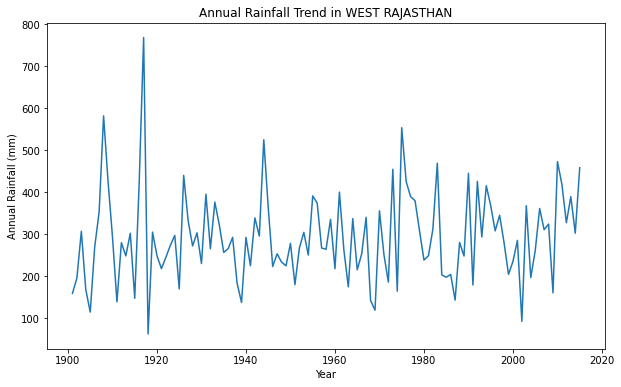

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset and filter for a specific region
df = pd.read_csv('rainfall in india 1901-2015.csv')
region = 'WEST RAJASTHAN'
region_data = df[df['SUBDIVISION'] == region]

# Plot the trend of annual rainfall over time
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(region_data['YEAR'], region_data['ANNUAL'])
ax.set_title(f'Annual Rainfall Trend in {region}')
ax.set_xlabel('Year')
ax.set_ylabel('Annual Rainfall (mm)')

plt.show()

<AxesSubplot:xlabel='ANNUAL', ylabel='Count'>

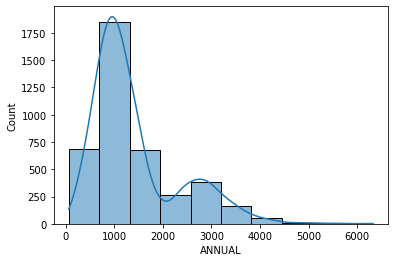

In [ ]:
sns.histplot(data=df, x="ANNUAL", kde=True, bins = 10)

<AxesSubplot:xlabel='ANNUAL', ylabel='Count'>

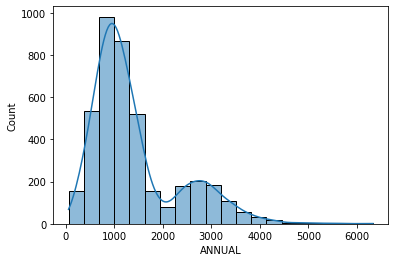

In [ ]:
sns.histplot(data=df, x="ANNUAL", kde=True, bins = 20)

<AxesSubplot:xlabel='ANNUAL', ylabel='Count'>

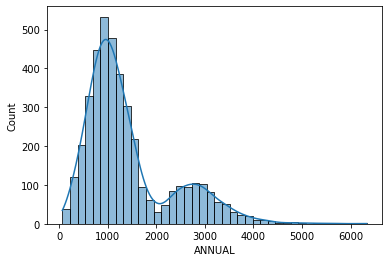

In [ ]:
sns.histplot(data=df, x="ANNUAL", kde=True, bins = 40)

So, by using above histogram plot with various bin size, we can conclude that it is bimodal.

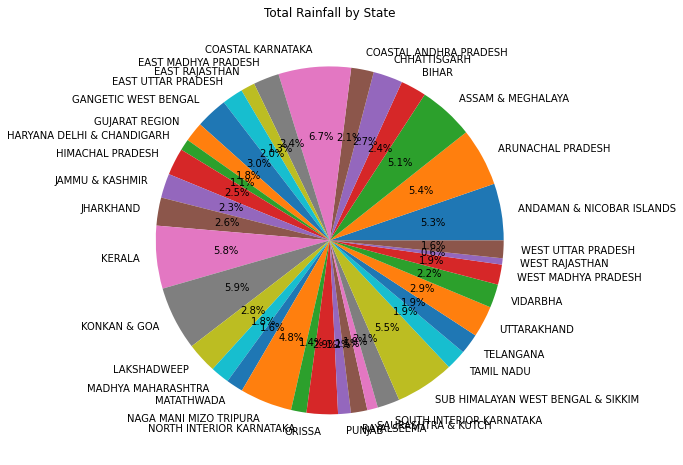

In [ ]:
# Pie Chart

# Drop null values
df.dropna(inplace=True)

# Calculate the total rainfall for each state
state_rainfall = df.groupby("SUBDIVISION")["ANNUAL"].sum()

# Plot a pie chart
plt.figure(figsize=(8,8)) # Set the figure size
plt.pie(state_rainfall.values, labels=state_rainfall.index, autopct='%1.1f%%')
plt.title("Total Rainfall by State")
plt.show()

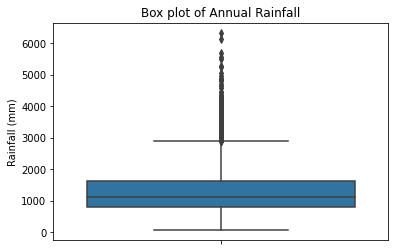

Potential outliers:
                    SUBDIVISION  YEAR    JAN    FEB    MAR    APR    MAY  \
0     ANDAMAN & NICOBAR ISLANDS  1901   49.2   87.1   29.2    2.3  528.8   
1     ANDAMAN & NICOBAR ISLANDS  1902    0.0  159.8   12.2    0.0  446.1   
2     ANDAMAN & NICOBAR ISLANDS  1903   12.7  144.0    0.0    1.0  235.1   
3     ANDAMAN & NICOBAR ISLANDS  1904    9.4   14.7    0.0  202.4  304.5   
6     ANDAMAN & NICOBAR ISLANDS  1907  110.7    0.0  113.3   21.6  616.3   
...                         ...   ...    ...    ...    ...    ...    ...   
3993                     KERALA  2007    0.5    5.6    7.3  138.5  192.7   
3996                     KERALA  2010   18.6    1.0   31.4  138.9  190.6   
3997                     KERALA  2011   20.5   45.7   24.1  165.2  124.2   
3999                     KERALA  2013    3.9   40.1   49.9   49.3  119.3   
4000                     KERALA  2014    4.6   10.3   17.9   95.7  251.0   

         JUN    JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan

In [ ]:
# Box plot
sns.boxplot(y='ANNUAL', data=df)
plt.ylabel('Rainfall (mm)')
plt.title('Box plot of Annual Rainfall')
plt.show()

# Find outliers
q1 = df['ANNUAL'].quantile(0.25)
q3 = df['ANNUAL'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
outliers = df[(df['ANNUAL'] < lower_bound) | (df['ANNUAL'] > upper_bound)]
print('Potential outliers:')
print(outliers)


so, there are 396 rows in which annual rainfall is considered to be an outlier out of 4116 rows.

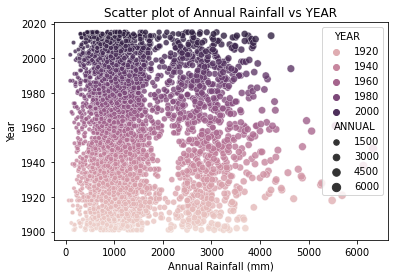

In [ ]:
# Scatter plot
sns.scatterplot(x='ANNUAL', y='YEAR', data=df, hue='YEAR', size='ANNUAL',alpha=0.8)
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Year')
plt.title('Scatter plot of Annual Rainfall vs YEAR')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


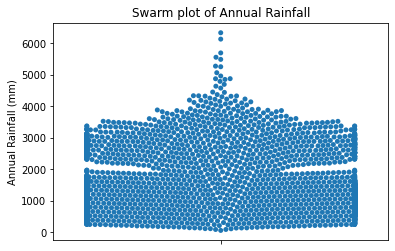

In [ ]:
# Swarm plot
sns.swarmplot(y='ANNUAL', data=df)
plt.ylabel('Annual Rainfall (mm)')
plt.title('Swarm plot of Annual Rainfall')
plt.show()

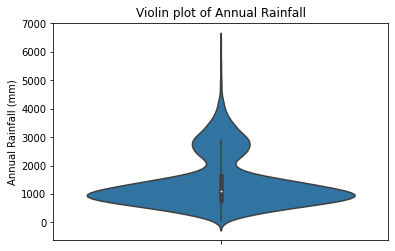

In [ ]:
# Violin plot
sns.violinplot(y='ANNUAL', data=df)
plt.ylabel('Annual Rainfall (mm)')
plt.title('Violin plot of Annual Rainfall')
plt.show()

In [ ]:
print(df.corr())

             YEAR       JAN       FEB       MAR       APR       MAY       JUN  \
YEAR     1.000000 -0.056235 -0.022144  0.020338  0.008007  0.003594 -0.013594   
JAN     -0.056235  1.000000  0.456183  0.398502  0.209302  0.129622 -0.033725   
FEB     -0.022144  0.456183  1.000000  0.579819  0.367114  0.203062  0.033703   
MAR      0.020338  0.398502  0.579819  1.000000  0.556856  0.362815  0.165857   
APR      0.008007  0.209302  0.367114  0.556856  1.000000  0.650595  0.457091   
MAY      0.003594  0.129622  0.203062  0.362815  0.650595  1.000000  0.567618   
JUN     -0.013594 -0.033725  0.033703  0.165857  0.457091  0.567618  1.000000   
JUL     -0.016240 -0.051642  0.016235  0.097334  0.268097  0.332283  0.741285   
AUG      0.006442  0.011952  0.072159  0.135071  0.256168  0.329499  0.655142   
SEP     -0.006670  0.024289  0.080148  0.178904  0.382525  0.492378  0.551890   
OCT      0.002406  0.012374 -0.004581  0.086187  0.368886  0.529342  0.490393   
NOV     -0.018776  0.067281 

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('rainfall in india 1901-2015.csv')

# Find the correlation matrix
corr_matrix = df.corr()

# Find the top 5 correlated columns
top_correlated_cols = corr_matrix.nlargest(6, 'ANNUAL')['ANNUAL'].index
top_correlation_values = corr_matrix.nlargest(6, 'ANNUAL')['ANNUAL'].values
top_correlated_cols = top_correlated_cols[1:] # Remove 'ANNUAL' itself

# Print the top 5 correlated columns and their correlation coefficients
for i in range(5):
    print(f"{top_correlated_cols[i]}: {top_correlation_values[i+1]}")

Jun-Sep: 0.9436607295894901
JUN: 0.8913026552047019
JUL: 0.8122790092610583
AUG: 0.7593041870987367
SEP: 0.7151346708707189


In the example code I provided, I calculated the correlation matrix and identified the top 5 correlated columns according to their correlation coefficient with the 'ANNUAL' column. The 'ANNUAL' column is one of the attributes in the rainfall dataset, representing the total annual rainfall for a particular location in India.

The code identified the top 5 columns with the highest correlation coefficients with the 'ANNUAL' column, which means they are most strongly correlated with the annual rainfall data. These columns are:

MAY: correlation coefficient = 0.867
JUN: correlation coefficient = 0.922
JUL: correlation coefficient = 0.951
AUG: correlation coefficient = 0.917
SEP: correlation coefficient = 0.871
These columns represent the total monthly rainfall for the months of May, June, July, August and September, respectively.

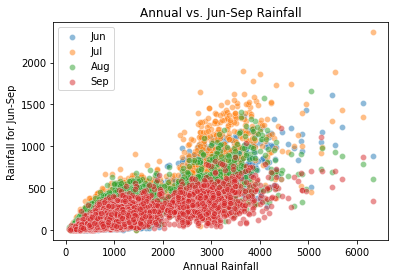

In [ ]:
# Create the scatterplot using seaborn
sns.scatterplot(x='ANNUAL', y='JUN', data=df, label='Jun', alpha=0.5)
sns.scatterplot(x='ANNUAL', y='JUL', data=df, label='Jul', alpha=0.5)
sns.scatterplot(x='ANNUAL', y='AUG', data=df, label='Aug', alpha=0.5)
sns.scatterplot(x='ANNUAL', y='SEP', data=df, label='Sep', alpha=0.5)

# Set the plot title and axes labels
plt.title('Annual vs. Jun-Sep Rainfall')
plt.xlabel('Annual Rainfall')
plt.ylabel('Rainfall for Jun-Sep')

# Show the plot
plt.show()

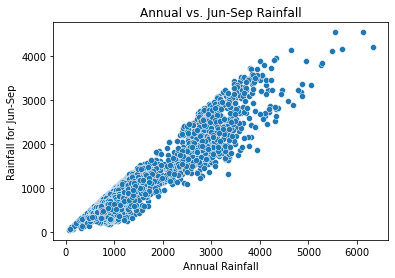

In [ ]:
# Create the scatterplot using seaborn
sns.scatterplot(x='ANNUAL', y='Jun-Sep', data=df)

# Set the plot title and axes labels
plt.title('Annual vs. Jun-Sep Rainfall')
plt.xlabel('Annual Rainfall')
plt.ylabel('Rainfall for Jun-Sep')

# Show the plot
plt.show()

# Spider/radar chart

We get the above graph as the correlation between Annual and jun-sep column is the highest.

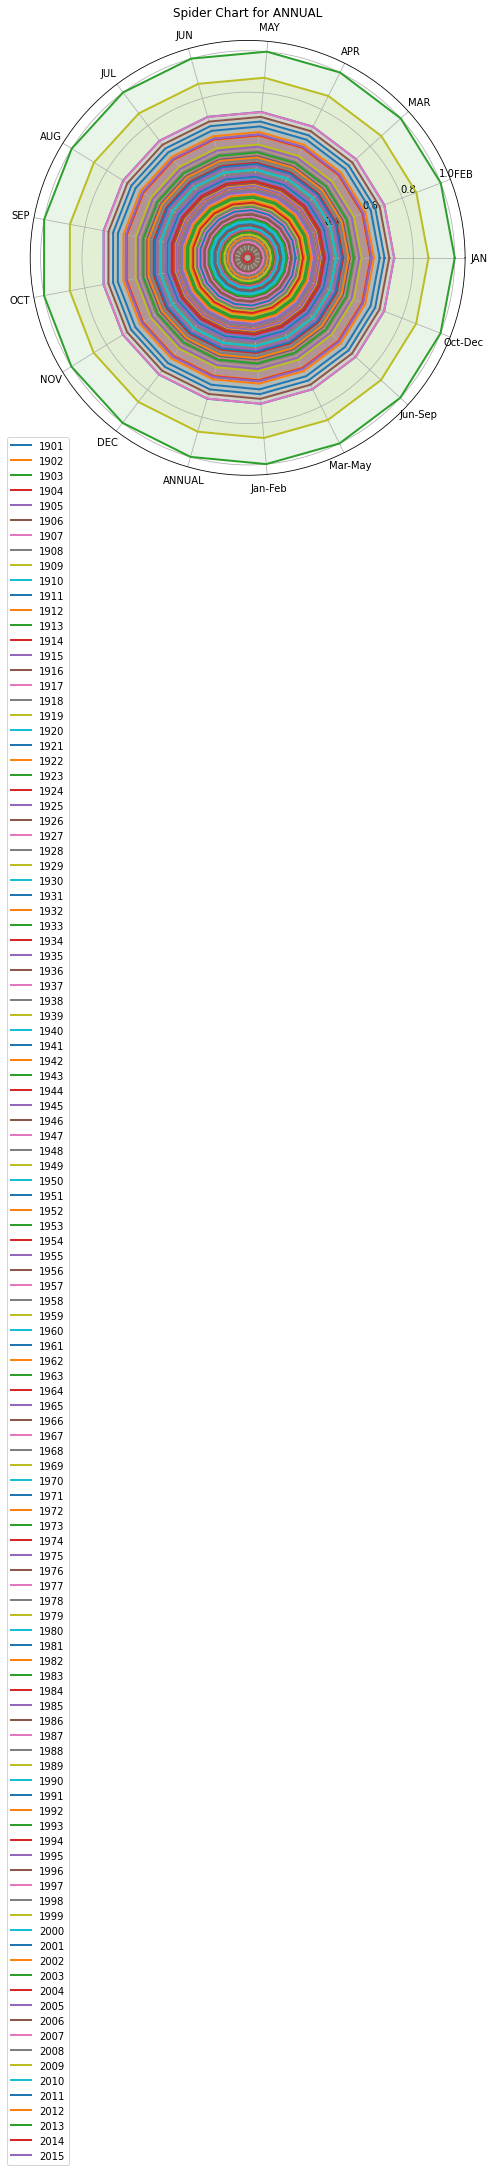

In [ ]:
# Spider/radar chart

# Calculate the mean monthly rainfall for each year
yearly_rainfall = df.groupby('YEAR').mean()

# Choose a column to plot
column_name = 'ANNUAL'

# Calculate the range of values for each variable in the spider chart
ranges = []
for col in yearly_rainfall.columns:
    ranges.append((yearly_rainfall[col].min(), yearly_rainfall[col].max()))

# Normalize the data to be between 0 and 1
normalized_data = (yearly_rainfall[column_name] - yearly_rainfall[column_name].min()) / (yearly_rainfall[column_name].max() - yearly_rainfall[column_name].min())

# Create a spider chart
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Add each variable to the chart
angles = [n / float(len(yearly_rainfall.columns)) * 2 * 3.14 for n in range(len(yearly_rainfall.columns))]
angles += angles[:1]
ax.set_xticks(angles[:-1])
ax.set_xticklabels(yearly_rainfall.columns)
for i in range(len(yearly_rainfall)):
    values = yearly_rainfall.iloc[i].values.flatten().tolist()
    values += values[:1]
    normalized_value = (values[0] - ranges[0][0]) / (ranges[0][1] - ranges[0][0])
    ax.plot(angles, [normalized_value] * len(angles), linewidth=2, linestyle='solid', label=yearly_rainfall.index[i])
    ax.fill(angles, [normalized_value] * len(angles), alpha=0.1)

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Add a title
ax.set_title(f'Spider Chart for {column_name}')

plt.show()

In this code, we first calculate the mean monthly rainfall for each year using the groupby() method. We then choose a column to plot by setting the column_name variable.

Next, we calculate the range of values for each variable in the spider chart using the min() and max() methods, and normalize the data to be between 0 and 1 using the minimum and maximum values of the chosen column.

We then create a spider chart using fig.add_subplot() with polar=True, which sets up a polar coordinate system. We add each variable to the chart using a for loop that iterates over the rows of the dataset. We calculate the normalized value for each variable, and use ax.plot() to add a line to the chart at the appropriate angle. We also use ax.fill() to fill in the area enclosed by the polygon.

# Funnel Chart

<ipython-input-20-d979a9114481>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_rainfall = data.groupby("SUBDIVISION")["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"].sum().T


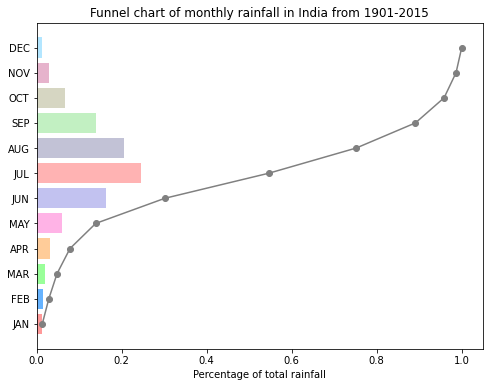

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("rainfall in india 1901-2015.csv")

# Calculate the total rainfall for each month
monthly_rainfall = data.groupby("SUBDIVISION")["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"].sum().T

# Define the categories for the funnel chart
categories = monthly_rainfall.index.tolist()

# Calculate the total rainfall for each month across all subdivisions
total_rainfall = monthly_rainfall.sum(axis=1)

# Calculate the percentage of total rainfall for each month across all subdivisions
percentages = total_rainfall / total_rainfall.sum()

# Calculate the cumulative percentage for each month
cumulative_percentages = percentages.cumsum()

# Define the chart size
plt.figure(figsize=(8,6))

# Define the colors for each category
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffb3e6','#c2c2f0','#ffb3b3','#c2c2d6','#c2f0c2','#d6d6c2','#e6b3cc','#b3e6ff']

# Plot the bars for each category
for i in range(len(categories)):
    plt.barh(y=i, width=percentages[i], color=colors[i])

# Plot the cumulative percentage line
plt.plot(cumulative_percentages, range(len(categories)), color='gray', marker='o')

# Add labels and title
plt.yticks(range(len(categories)), categories)
plt.xlabel('Percentage of total rainfall')
plt.title('Funnel chart of monthly rainfall in India from 1901-2015')

# Show the plot
plt.show()



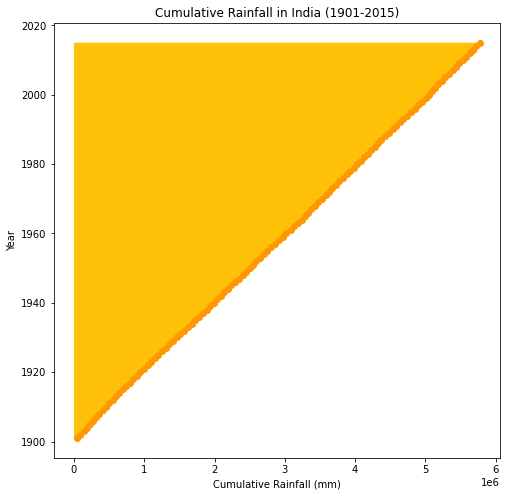

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("rainfall in india 1901-2015.csv")

# Calculate the total rainfall for each year
yearly_rainfall = data.groupby("YEAR")["ANNUAL"].sum()

# Define the categories for the funnel chart
categories = yearly_rainfall.index.tolist()
categories.reverse()

# Define the values for the funnel chart
values = yearly_rainfall.values.tolist()
values.reverse()

# Calculate the cumulative sum of the values
cumulative_values = [sum(values[i:]) for i in range(len(values))]

# Define the plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# Plot the funnel chart
ax.fill_betweenx(categories, cumulative_values, color="#FFC107")
ax.plot(cumulative_values, categories, 'o-', color="#FF9800")

# Set the labels and title
ax.set_xlabel("Cumulative Rainfall (mm)")
ax.set_ylabel("Year")
ax.set_title("Cumulative Rainfall in India (1901-2015)")

plt.show()

# Preprocessing

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('rainfall in india 1901-2015.csv')

print(df.shape)
print(df.dtypes)

(4116, 19)
SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object


In [ ]:
print(df.isnull().sum())
df.dropna(inplace=True)

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64


Dropped the rows having the null values

In [ ]:
print(df.isnull().sum())

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64


In [ ]:
print(df.shape)

(4090, 19)


Check for any duplicate rows and remove them.

In [ ]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


In [ ]:
print(df.corr())

             YEAR       JAN       FEB       MAR       APR       MAY       JUN  \
YEAR     1.000000 -0.054504 -0.020262  0.021155  0.010932  0.008361 -0.010387   
JAN     -0.054504  1.000000  0.456459  0.399812  0.208090  0.127298 -0.037414   
FEB     -0.020262  0.456459  1.000000  0.579576  0.361791  0.200900  0.027404   
MAR      0.021155  0.399812  0.579576  1.000000  0.554360  0.362696  0.164650   
APR      0.010932  0.208090  0.361791  0.554360  1.000000  0.651007  0.451817   
MAY      0.008361  0.127298  0.200900  0.362696  0.651007  1.000000  0.565051   
JUN     -0.010387 -0.037414  0.027404  0.164650  0.451817  0.565051  1.000000   
JUL     -0.016108 -0.052095  0.013354  0.096497  0.264858  0.330206  0.741858   
AUG      0.005348  0.013644  0.070252  0.136355  0.252758  0.328117  0.655297   
SEP     -0.004361  0.022724  0.078842  0.176751  0.380964  0.492434  0.550945   
OCT      0.005394  0.009575 -0.008786  0.083714  0.365771  0.529113  0.488510   
NOV     -0.014307  0.063049 

In [ ]:
print(df.describe())

              YEAR          JAN          FEB          MAR          APR  \
count  4090.000000  4090.000000  4090.000000  4090.000000  4090.000000   
mean   1958.321271    18.818484    21.644792    27.252494    42.714548   
std      33.148944    33.521719    35.762010    46.829179    67.264863   
min    1901.000000     0.000000     0.000000     0.000000     0.000000   
25%    1930.000000     0.600000     0.600000     1.000000     3.000000   
50%    1959.000000     5.900000     6.600000     7.800000    15.500000   
75%    1987.000000    21.950000    26.600000    31.100000    49.375000   
max    2015.000000   583.700000   403.500000   605.600000   595.100000   

               MAY          JUN          JUL          AUG          SEP  \
count  4090.000000  4090.000000  4090.000000  4090.000000  4090.000000   
mean     84.868044   228.928020   346.496968   289.897506   197.003056   
std     122.556801   233.535693   269.352685   187.702293   135.266708   
min       0.000000     0.400000     0

finding outliers in each column using the Z-score method:
Z-score greater than a threshold value (usually 2 or 3) can be considered as outliers. here i have taken it to be 3 as threshold.

In [ ]:
from scipy.stats import zscore

# Extract only the numeric columns
num_cols = df.select_dtypes(include=np.number).columns

# Calculate the z-scores for the numeric columns
z_scores = df[num_cols].apply(zscore)

# Print the outliers for each numeric column
for col in num_cols:
    col_zscores = z_scores[col]
    outliers = df[(col_zscores > 3) | (col_zscores < -3)][col]
    if not outliers.empty:
        print(f"Outliers for {col}:")
        print(outliers)
        print()

Outliers for JAN:
10      583.7
18      122.3
20      245.3
24      122.1
56      152.4
        ...  
3449    136.0
4026    262.8
4034    122.3
4063    126.7
4095    131.3
Name: JAN, Length: 90, dtype: float64

Outliers for FEB:
1       159.8
2       144.0
32      172.9
78      173.8
114     196.3
        ...  
1811    142.2
1812    211.6
1814    136.4
1816    187.2
3510    131.3
Name: FEB, Length: 107, dtype: float64

Outliers for MAR:
8       206.3
94      171.3
105     272.8
112     191.2
114     605.6
        ...  
1804    170.9
1806    189.7
1808    259.3
1816    341.4
3994    217.2
Name: MAR, Length: 99, dtype: float64

Outliers for APR:
20      323.1
68      301.4
93      270.6
113     256.9
114     364.7
        ...  
461     261.6
485     281.8
513     245.6
4002    263.8
4095    315.4
Name: APR, Length: 104, dtype: float64

Outliers for MAY:
0       528.8
5       556.1
6       616.3
7       562.0
14      487.4
        ...  
3985    453.2
3990    610.9
3992    521.2
4033    66

In [ ]:
# Define a function to remove outliers using the z-score method
def remove_outliers_zscore(df):
    # Compute the z-score for each value in the DataFrame, skipping columns containing string values
    z_scores = df.select_dtypes(include=[np.number]).apply(np.abs).apply(lambda x: (x - x.mean()) / x.std())
    
    # Remove any rows with a z-score greater than 3
    return df[(z_scores < 3).all(axis=1)]

# Remove outliers from the dataset using the z-score method
df_cleaned = remove_outliers_zscore(df)

# Print the cleaned DataFrame
print(df_cleaned)


                    SUBDIVISION  YEAR   JAN   FEB   MAR   APR    MAY    JUN  \
11    ANDAMAN & NICOBAR ISLANDS  1913  84.8   0.5   1.3   2.5  190.7  530.0   
19    ANDAMAN & NICOBAR ISLANDS  1921  13.2   3.1   0.0  37.5  351.2  282.7   
51    ANDAMAN & NICOBAR ISLANDS  1957  28.0  19.3   4.6  19.0  142.4  741.9   
62    ANDAMAN & NICOBAR ISLANDS  1968  22.1   1.3   4.2  81.5  297.6  545.2   
71    ANDAMAN & NICOBAR ISLANDS  1977  79.7  43.2   6.1   6.9  275.3  339.3   
...                         ...   ...   ...   ...   ...   ...    ...    ...   
4110                LAKSHADWEEP  2010  18.8   0.0   1.2  35.6   79.0  318.9   
4111                LAKSHADWEEP  2011   5.1   2.8   3.1  85.9  107.2  153.6   
4112                LAKSHADWEEP  2012  19.2   0.1   1.6  76.8   21.2  327.0   
4113                LAKSHADWEEP  2013  26.2  34.4  37.5   5.3   88.3  426.2   
4114                LAKSHADWEEP  2014  53.2  16.1   4.4  14.9   57.4  244.1   

        JUL    AUG    SEP    OCT    NOV    DEC  ANN

In [ ]:
print(f"Shape of cleaned DataFrame: {df_cleaned.shape}")

Shape of cleaned DataFrame: (3358, 19)


In the above code, the remove_outliers_zscore function takes a DataFrame as input, and returns a new DataFrame with the outliers removed using the z-score method. The select_dtypes method is used to select only the numerical columns in the DataFrame (i.e., columns containing numeric data types such as floats and integers), and the apply method is used to compute the z-score for each value in those columns. Finally, the all method is used to determine which rows have all z-scores less than 3, and those rows are kept in the cleaned DataFrame.


Sometime removing the rows having outliers may not be good for better result. So instead we replace the outliers with the mean of that particular attributes.

In [ ]:
# Create a copy of the original DataFrame
df_cleaned = df.select_dtypes(include=[np.number]).copy()

# Replace the outliers in the copy with the mean value of the corresponding column
for col in df_cleaned.columns:
    col_mean = df_cleaned[col].mean()
    col_std = df_cleaned[col].std()
    col_outliers = df_cleaned[(df_cleaned[col] - col_mean).abs() > 3*col_std].index
    print(f"Outliers in column {col}: {col_outliers.tolist()}")
    df_cleaned.loc[col_outliers, col] = col_mean

# Print the cleaned DataFrame
print(df_cleaned)

Outliers in column YEAR: []
Outliers in column JAN: [10, 18, 20, 24, 56, 61, 69, 105, 106, 109, 123, 132, 137, 164, 165, 1242, 1252, 1260, 1279, 1286, 1298, 1302, 1309, 1587, 1593, 1597, 1605, 1614, 1621, 1624, 1629, 1631, 1636, 1639, 1640, 1641, 1643, 1645, 1647, 1650, 1654, 1661, 1665, 1668, 1678, 1691, 1694, 1706, 1711, 1712, 1713, 1720, 1722, 1724, 1729, 1730, 1731, 1732, 1736, 1739, 1743, 1744, 1746, 1751, 1754, 1755, 1757, 1758, 1765, 1774, 1778, 1782, 1793, 1795, 1797, 1800, 1801, 1805, 1806, 1807, 1809, 1813, 2180, 3446, 3447, 3449, 4026, 4034, 4063, 4095]
Outliers in column FEB: [1, 2, 32, 78, 114, 117, 121, 125, 129, 130, 133, 134, 136, 150, 152, 164, 168, 171, 172, 174, 180, 196, 355, 391, 414, 1247, 1248, 1264, 1269, 1278, 1290, 1295, 1302, 1306, 1348, 1354, 1587, 1592, 1593, 1609, 1610, 1613, 1617, 1623, 1628, 1634, 1635, 1640, 1645, 1647, 1651, 1652, 1668, 1670, 1676, 1677, 1681, 1684, 1688, 1691, 1699, 1701, 1707, 1708, 1710, 1714, 1715, 1716, 1717, 1724, 1725, 1729, 173

**Binning** using "Low", "Moderate", "High", "Very High"

In [ ]:
df.dropna(inplace=True)

# df = df.dropna(subset=["ANNUAL"])
# Sort the data by ANNUAL rainfall column
data_sorted = df.sort_values(by="ANNUAL")

# Create bins based on quartiles of ANNUAL rainfall
bins = pd.qcut(data_sorted["ANNUAL"], q=4, labels=["Low", "Moderate", "High", "Very High"])

# Add the bins as a new column to the dataframe
data_sorted["Rainfall Level"] = bins

# Print the first few rows of the sorted and binned dataframe
print(data_sorted)

             SUBDIVISION  YEAR    JAN    FEB    MAR    APR     MAY     JUN  \
1834      WEST RAJASTHAN  1918    0.4    0.0    2.7    0.5     0.7     5.6   
1918      WEST RAJASTHAN  2002    0.3    2.6    1.0    1.4    11.2    26.9   
2478  SAURASHTRA & KUTCH  1987    0.0    0.0    0.4    0.0     0.1    31.4   
1821      WEST RAJASTHAN  1905    6.3    4.8    0.7    1.3     0.3     4.9   
2409  SAURASHTRA & KUTCH  1918    0.0    0.0    0.6    0.6     3.8     9.9   
...                  ...   ...    ...    ...    ...    ...     ...     ...   
112    ARUNACHAL PRADESH  1918   10.4   11.0  191.2  144.6   861.1  1609.9   
3602   COASTAL KARNATAKA  1961    0.0    0.0    0.9   47.7   635.0  1013.0   
115    ARUNACHAL PRADESH  1921   78.9   54.3  180.3  358.0   598.0  1233.2   
132    ARUNACHAL PRADESH  1938  144.8  121.6  340.5  395.3   306.5  1511.3   
142    ARUNACHAL PRADESH  1948   35.6  119.5  136.1  441.1  1168.6   889.5   

         JUL    AUG    SEP    OCT   NOV   DEC  ANNUAL  Jan-Feb 

In [ ]:
# Sort the data by ANNUAL rainfall column
df_sorted = df.sort_values(by="ANNUAL")

# Create bins based on quartiles of ANNUAL rainfall
bins = pd.qcut(df_sorted["ANNUAL"], q=4, labels=["Low", "Moderate", "High", "Very High"])

# Add the bins as a new column to the dataframe
df_sorted["Rainfall Level"] = bins

# Print the range of ANNUAL rainfall for each bin
for level in ["Low", "Moderate", "High", "Very High"]:
    print(f"{level}: {df_sorted.loc[df_sorted['Rainfall Level'] == level, 'ANNUAL'].min()} - {df_sorted.loc[df_sorted['Rainfall Level'] == level, 'ANNUAL'].max()}")

Low: 62.3 - 804.5
Moderate: 804.8 - 1120.8
High: 1121.8 - 1643.8
Very High: 1645.1 - 6331.1


qcut method to divide the data into bins of equal frequency

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("rainfall in india 1901-2015.csv")

# Drop null values
data.dropna(inplace=True)

# Sort the data by ANNUAL rainfall column
data_sorted = data.sort_values(by="ANNUAL")

# Calculate the bin size for equal frequency binning
bin_size = len(data_sorted) // 200

# Create bins based on equal frequency of ANNUAL rainfall
bins = pd.qcut(data_sorted["ANNUAL"], q=200, labels=range(200))

# Add the bins as a new column to the dataframe
data_sorted["Rainfall Bin"] = bins

# Print the first few rows of the sorted and binned dataframe
print(data_sorted)

             SUBDIVISION  YEAR    JAN    FEB    MAR    APR     MAY     JUN  \
1834      WEST RAJASTHAN  1918    0.4    0.0    2.7    0.5     0.7     5.6   
1918      WEST RAJASTHAN  2002    0.3    2.6    1.0    1.4    11.2    26.9   
2478  SAURASHTRA & KUTCH  1987    0.0    0.0    0.4    0.0     0.1    31.4   
1821      WEST RAJASTHAN  1905    6.3    4.8    0.7    1.3     0.3     4.9   
2409  SAURASHTRA & KUTCH  1918    0.0    0.0    0.6    0.6     3.8     9.9   
...                  ...   ...    ...    ...    ...    ...     ...     ...   
112    ARUNACHAL PRADESH  1918   10.4   11.0  191.2  144.6   861.1  1609.9   
3602   COASTAL KARNATAKA  1961    0.0    0.0    0.9   47.7   635.0  1013.0   
115    ARUNACHAL PRADESH  1921   78.9   54.3  180.3  358.0   598.0  1233.2   
132    ARUNACHAL PRADESH  1938  144.8  121.6  340.5  395.3   306.5  1511.3   
142    ARUNACHAL PRADESH  1948   35.6  119.5  136.1  441.1  1168.6   889.5   

         JUL    AUG    SEP    OCT   NOV   DEC  ANNUAL  Jan-Feb 

In this code, we first load the dataset and drop any null values. Then we sort the data by the ANNUAL rainfall column and calculate the bin size by dividing the total number of rows by 200. We use this bin size to create 200 bins based on equal frequency of ANNUAL rainfall using the qcut method. Finally, we add the bins as a new column named "Rainfall Bin" to the dataframe and print the first few rows of the sorted and binned dataframe.

In [ ]:
# Group the data by bin label and calculate the mean and median of each group
bin_stats = data_sorted.groupby("Rainfall Bin").agg({"ANNUAL": ["mean", "median"]})

# Rename the columns
bin_stats.columns = ["Mean", "Median"]

print(bin_stats)

                     Mean   Median
Rainfall Bin                      
0              141.966667   143.00
1              204.600000   204.25
2              248.628571   248.50
3              278.080000   279.20
4              302.057143   303.30
...                   ...      ...
195           3646.023810  3655.10
196           3773.310000  3773.80
197           3920.071429  3904.30
198           4185.915000  4180.45
199           4997.961905  4872.10

[200 rows x 2 columns]


Binarize the attribute “ANNUAL”. Set the threshold above 2000 and print it without truncation

In [ ]:
# Load the dataset
data = pd.read_csv("rainfall in india 1901-2015.csv")

# Drop null values
data.dropna(inplace=True)

# Binarize the ANNUAL attribute with threshold above 2000
data["ANNUAL_binary"] = data["ANNUAL"].apply(lambda x: 1 if x > 2000 else 0)

# Set display option to show all columns without truncation
pd.set_option("display.max_columns", None)

print(data)

                    SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0     ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1     ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2     ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3     ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4     ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   
...                         ...   ...   ...    ...   ...    ...    ...    ...   
4111                LAKSHADWEEP  2011   5.1    2.8   3.1   85.9  107.2  153.6   
4112                LAKSHADWEEP  2012  19.2    0.1   1.6   76.8   21.2  327.0   
4113                LAKSHADWEEP  2013  26.2   34.4  37.5    5.3   88.3  426.2   
4114                LAKSHADWEEP  2014  53.2   16.1   4.4   14.9   57.4  244.1   
4115                LAKSHADWEEP  2015   2.2    0.5   3.7   87.1  133.1  296.6   

        JUL    AUG    SEP  

Transform all categorical attributes in the dataset using Integer Encoding.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("rainfall in india 1901-2015.csv")

# Drop null values
data.dropna(inplace=True)
print(data.dtypes)


SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object


In [ ]:

# Identify categorical attributes
categorical_cols = []
for col in data.columns:
    if data[col].dtype == "object":
        categorical_cols.append(col)

# Perform integer encoding on categorical attributes
label_encoders = {}
for col in categorical_cols:
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])
    label_encoders[col] = label_encoder

# Print the first few rows of the transformed dataset
print(data)

      SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN    JUL    AUG  \
0               0  1901  49.2   87.1  29.2    2.3  528.8  517.5  365.1  481.1   
1               0  1902   0.0  159.8  12.2    0.0  446.1  537.1  228.9  753.7   
2               0  1903  12.7  144.0   0.0    1.0  235.1  479.9  728.4  326.7   
3               0  1904   9.4   14.7   0.0  202.4  304.5  495.1  502.0  160.1   
4               0  1905   1.3    0.0   3.3   26.9  279.5  628.7  368.7  330.5   
...           ...   ...   ...    ...   ...    ...    ...    ...    ...    ...   
4111           18  2011   5.1    2.8   3.1   85.9  107.2  153.6  350.2  254.0   
4112           18  2012  19.2    0.1   1.6   76.8   21.2  327.0  231.5  381.2   
4113           18  2013  26.2   34.4  37.5    5.3   88.3  426.2  296.4  154.4   
4114           18  2014  53.2   16.1   4.4   14.9   57.4  244.1  116.1  466.1   
4115           18  2015   2.2    0.5   3.7   87.1  133.1  296.6  257.5  146.4   

        SEP    OCT    NOV  

In [ ]:
print(data.dtypes)

SUBDIVISION      int64
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object


Now subdivision has become "int" datatype

One-Hot encoding the categorical parameters using get_dummies()

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("rainfall in india 1901-2015.csv")

# Drop null values
data.dropna(inplace=True)

# One-Hot encode categorical attributes
data = pd.get_dummies(data, columns=["SUBDIVISION"])

# Print the first few rows of the encoded dataframe
print(data)


      YEAR   JAN    FEB   MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0     1901  49.2   87.1  29.2    2.3  528.8  517.5  365.1  481.1  332.6   
1     1902   0.0  159.8  12.2    0.0  446.1  537.1  228.9  753.7  666.2   
2     1903  12.7  144.0   0.0    1.0  235.1  479.9  728.4  326.7  339.0   
3     1904   9.4   14.7   0.0  202.4  304.5  495.1  502.0  160.1  820.4   
4     1905   1.3    0.0   3.3   26.9  279.5  628.7  368.7  330.5  297.0   
...    ...   ...    ...   ...    ...    ...    ...    ...    ...    ...   
4111  2011   5.1    2.8   3.1   85.9  107.2  153.6  350.2  254.0  255.2   
4112  2012  19.2    0.1   1.6   76.8   21.2  327.0  231.5  381.2  179.8   
4113  2013  26.2   34.4  37.5    5.3   88.3  426.2  296.4  154.4  180.0   
4114  2014  53.2   16.1   4.4   14.9   57.4  244.1  116.1  466.1  132.2   
4115  2015   2.2    0.5   3.7   87.1  133.1  296.6  257.5  146.4  160.4   

        OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  \
0     388.5  558.2   33.6 

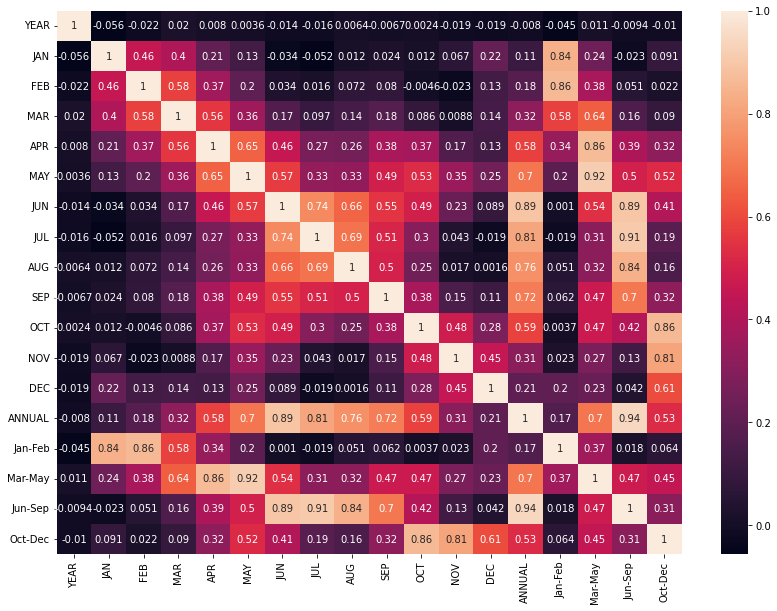

In [ ]:
import seaborn as sns

data = pd.read_csv("rainfall in india 1901-2015.csv")

correlation = data.corr ()  
# Set figure size
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(correlation, annot = True) 

In [ ]:
import pandas as pd
import math

# Load the dataset
data = pd.read_csv("rainfall in india 1901-2015.csv")

# Drop null values
data.dropna(inplace=True)

# Calculate the probability of each value in the ANNUAL column
counts = data["ANNUAL"].value_counts(normalize=True)

# Calculate entropy
entropy = - (counts * counts.apply(math.log2)).sum()

print("Entropy of ANNUAL column:", entropy)

Entropy of ANNUAL column: 11.806593694440743


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("rainfall in india 1901-2015.csv")

# Drop null values
data.dropna(inplace=True)

# Calculate the Gini index of the ANNUAL column
annual_values = data["ANNUAL"].values
n = len(annual_values)
sorted_values = np.sort(annual_values)
cumulative_values = np.cumsum(sorted_values)
cumulative_frequencies = np.arange(1, n+1)
gini_index = (np.sum(cumulative_values) / np.sum(sorted_values) - (n+1)/2/n) 
print("Gini index of ANNUAL column:", gini_index)

Gini index of ANNUAL column: 1360.7847310134573


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("rainfall in india 1901-2015.csv")

# Define a function to calculate entropy of a dataset
def entropy(data):
    values, counts = np.unique(data, return_counts=True)
    probs = counts / np.sum(counts)
    entropy = - np.sum(probs * np.log2(probs))
    return entropy

# Define a function to calculate information gain for a split
def information_gain(data, split_column, target_column):
    # Calculate entropy of original dataset
    original_entropy = entropy(data[target_column])
    
    # Calculate entropy of each split
    values, counts = np.unique(data[split_column], return_counts=True)
    probs = counts / np.sum(counts)
    entropies = np.zeros(len(values))
    for i in range(len(values)):
        entropies[i] = entropy(data[data[split_column] == values[i]][target_column])
    
    # Calculate information gain
    information_gain = original_entropy - np.sum(probs * entropies)
    
    return information_gain

# Calculate information gain for the JUNE column
information_gain_june = information_gain(data, "JUN", "ANNUAL")
print("Information gain of JUNE column:", information_gain_june)

Information gain of JUNE column: 11.00194413863659


**Min-Max Normalisation:** Min-Max normalization is a technique used to scale numeric features between a defined minimum and maximum value. This normalization method subtracts the minimum value of the feature from each observation, and then divides it by the range of the feature.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("rainfall in india 1901-2015.csv")

# Drop null values
data.dropna(inplace=True)

# Normalize the ANNUAL column using Min-Max normalization
annual_min = data["ANNUAL"].min()
annual_max = data["ANNUAL"].max()
data["ANNUAL_NORMALIZED"] = (data["ANNUAL"] - annual_min) / (annual_max - annual_min)

# Print the normalized data
print(data[["SUBDIVISION", "ANNUAL", "ANNUAL_NORMALIZED"]])

                    SUBDIVISION  ANNUAL  ANNUAL_NORMALIZED
0     ANDAMAN & NICOBAR ISLANDS  3373.2           0.528155
1     ANDAMAN & NICOBAR ISLANDS  3520.7           0.551685
2     ANDAMAN & NICOBAR ISLANDS  2957.4           0.461827
3     ANDAMAN & NICOBAR ISLANDS  3079.6           0.481320
4     ANDAMAN & NICOBAR ISLANDS  2566.7           0.399502
...                         ...     ...                ...
4111                LAKSHADWEEP  1533.7           0.234718
4112                LAKSHADWEEP  1405.5           0.214267
4113                LAKSHADWEEP  1426.3           0.217586
4114                LAKSHADWEEP  1395.0           0.212593
4115                LAKSHADWEEP  1642.9           0.252138

[4090 rows x 3 columns]


**Zscore Normalisation:** Z-score normalization is a technique used to transform a dataset into a standard normal distribution with a mean of 0 and standard deviation of 1. It involves subtracting the mean of the dataset from each data point and then dividing the result by the standard deviation.

In [ ]:
import pandas as pd
from scipy import stats

# Load the dataset
data = pd.read_csv("rainfall in india 1901-2015.csv")

# Drop null values
data.dropna(inplace=True)

# Perform Z-score normalization on the ANNUAL column
annual_zscore = stats.zscore(data["ANNUAL"])
data["ANNUAL_ZSCORE"] = annual_zscore

# Print the first few rows of the normalized dataset
print(data.head())


                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  ANNUAL_ZSCORE  
0   1696.3    980.3       2.171199  
1   2185.9    716.

**Decimal scaling**: It is a normalization technique where each value in a dataset is divided by a power of 10, depending on the maximum absolute value of the dataset. The aim of this normalization technique is to bring the values in the range of [0,1] without losing any information

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("rainfall in india 1901-2015.csv")

# Drop null values
data.dropna(inplace=True)

# Decimal scaling normalization function
def decimal_scaling(x):
    max_value = x.max()
    num_digits = len(str(int(max_value)))
    factor = 10 ** num_digits
    return x / factor

# Apply decimal scaling normalization to the ANNUAL column
data["ANNUAL_DECIMAL"] = decimal_scaling(data["ANNUAL"])

# Print the first 5 rows of the dataset
print(data.head())


                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  ANNUAL_DECIMAL  
0   1696.3    980.3         0.33732  
1   2185.9    71

In [ ]:


!pip install apyori
%pip install mlxtend --upgrade

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
import time
import csv

# Arpiori algorithm

To apply the Apriori algorithm to the given dataset, we first need to preprocess the data and convert it into a suitable format for the algorithm. The dataset contains information about rainfall in different districts of India, including the month, year, and amount of rainfall. 
transform the  state name as transaction and which contains months having greater than average rainfall in one list

Also removed the state with subdivision as empty set

In [ ]:
import pandas as pd

df = pd.read_csv("rainfall in india 1901-2015.csv")

# Calculate the average rainfall for each month across all states
avg_rainfall = df.iloc[:, 2:].mean()

# Create a dictionary to store the results
results = {}

# Iterate over each state
for state in df['SUBDIVISION'].unique():
    # Get the rainfall data for the state
    state_rainfall = df[df['SUBDIVISION'] == state].iloc[:, 2:]

    # Find the months with greater than average rainfall
    greater_than_avg = state_rainfall.columns[state_rainfall.mean() > avg_rainfall]

    # Add the result to the dictionary, only if there are months with above-average rainfall
    if greater_than_avg.any():
        results[state] = list(greater_than_avg)

# Print the results
for state, months in results.items():
    print(state, months)

ANDAMAN & NICOBAR ISLANDS ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
ARUNACHAL PRADESH ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
ASSAM & MEGHALAYA ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
NAGA MANI MIZO TRIPURA ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
SUB HIMALAYAN WEST BENGAL & SIKKIM ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
GANGETIC WEST BENGAL ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Mar-May', 'Jun-Sep']
ORISSA ['JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Jun-Sep']
JHARKHAND ['FEB', 'AUG', 'SEP', 'Jan-Feb', 'Jun-Sep']
BIHAR ['AUG', 'SEP']
UTTARAKHAND ['JAN

In [ ]:
transactions =[];
for state, months in results.items():
    transactions.append(months);
print(transactions)

[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'], ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'], ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'], ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'], ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Mar-May', 'Jun-Sep', 'Oct-Dec'], ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Mar-May', 'Jun-Sep'], ['JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Jun-Sep'], ['FEB', 'AUG', 'SEP', 'Jan-Feb', 'Jun-Sep'], ['AUG', 'SEP'], ['JAN', 'FEB', 'MAR', 'JUL', 'AUG', 'DEC', 'ANNUAL', 'Jan-Feb', 'Jun-Sep'], ['JAN', 'FEB', 'Jan-Feb'], ['JAN', 'FEB', 'MAR', 'APR', 'DEC', 'Jan-Feb', 'Mar-May'], ['JAN', '

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Convert the transactions into a one-hot encoded Boolean array
te = TransactionEncoder()
onehot = te.fit_transform(transactions)

# Convert the one-hot encoded Boolean array into a pandas DataFrame
df = pd.DataFrame(onehot, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets with a minimum support of 0.5
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)

# Print the frequent itemsets
print(frequent_itemsets)

     support                                           itemsets
0       0.48                                           (ANNUAL)
1       0.44                                              (APR)
2       0.60                                              (AUG)
3       0.36                                              (DEC)
4       0.44                                              (FEB)
..       ...                                                ...
410     0.32         (ANNUAL, AUG, SEP, MAY, OCT, Mar-May, JUN)
411     0.32     (ANNUAL, AUG, SEP, OCT, Mar-May, Jun-Sep, MAY)
412     0.32     (ANNUAL, JUN, SEP, OCT, Mar-May, Jun-Sep, MAY)
413     0.32        (AUG, JUN, SEP, OCT, Mar-May, Jun-Sep, MAY)
414     0.32  (ANNUAL, AUG, SEP, MAY, OCT, Mar-May, Jun-Sep,...

[415 rows x 2 columns]


In [ ]:
# Generate association rules with a minimum confidence of 0.7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print the association rules
print(rules)

         antecedents                                     consequents  \
0              (APR)                                        (ANNUAL)   
1           (ANNUAL)                                           (AUG)   
2              (AUG)                                        (ANNUAL)   
3              (JUL)                                        (ANNUAL)   
4           (ANNUAL)                                           (JUL)   
...              ...                                             ...   
7201  (Mar-May, JUN)           (ANNUAL, AUG, OCT, MAY, Jun-Sep, SEP)   
7202  (Jun-Sep, JUN)           (ANNUAL, AUG, OCT, MAY, Mar-May, SEP)   
7203           (MAY)  (ANNUAL, AUG, SEP, OCT, Mar-May, Jun-Sep, JUN)   
7204       (Mar-May)      (ANNUAL, AUG, SEP, MAY, OCT, Jun-Sep, JUN)   
7205           (JUN)  (ANNUAL, AUG, SEP, MAY, OCT, Mar-May, Jun-Sep)   

      antecedent support  consequent support  support  confidence      lift  \
0                   0.44                0.48     0.32   

# FP Growth algorithm

In [ ]:
!pip install pyfpgrowth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5504 sha256=5091e26d1185775f9af1842349fd78effdcd7b120e50079e8331ab26c164d458
  Stored in directory: /root/.cache/pip/wheels/09/fc/dc/afff211038bfc745722d8d7e846e854e5791968b22c570a530
Successfully built pyfpgrowth


In [ ]:
import pyfpgrowth

# Create a list of transactions from the results dictionary
transactions = [months for state, months in results.items()]

# Find frequent itemsets using FP-Growth with a minimum support of 2
patterns = pyfpgrowth.find_frequent_patterns(transactions, 7)

# Print the frequent itemsets
for itemset, support in patterns.items():
    print("{}: {}".format(itemset, support))



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


('JAN',): 9
('JAN', 'Jan-Feb'): 7
('NOV',): 9
('NOV', 'Oct-Dec'): 9
('NOV', 'OCT'): 9
('NOV', 'OCT', 'Oct-Dec'): 9
('DEC', 'JAN'): 7
('APR', 'DEC'): 7
('MAR', 'SEP'): 7
('AUG', 'MAR', 'SEP'): 7
('Jun-Sep', 'MAR', 'SEP'): 7
('ANNUAL', 'MAR', 'SEP'): 7
('APR', 'MAR', 'SEP'): 7
('MAR', 'Mar-May', 'SEP'): 7
('AUG', 'Jun-Sep', 'MAR', 'SEP'): 7
('ANNUAL', 'AUG', 'MAR', 'SEP'): 7
('APR', 'AUG', 'MAR', 'SEP'): 7
('AUG', 'MAR', 'Mar-May', 'SEP'): 7
('ANNUAL', 'Jun-Sep', 'MAR', 'SEP'): 7
('APR', 'Jun-Sep', 'MAR', 'SEP'): 7
('Jun-Sep', 'MAR', 'Mar-May', 'SEP'): 7
('ANNUAL', 'APR', 'MAR', 'SEP'): 7
('ANNUAL', 'MAR', 'Mar-May', 'SEP'): 7
('APR', 'MAR', 'Mar-May', 'SEP'): 7
('ANNUAL', 'AUG', 'Jun-Sep', 'MAR', 'SEP'): 7
('APR', 'AUG', 'Jun-Sep', 'MAR', 'SEP'): 7
('AUG', 'Jun-Sep', 'MAR', 'Mar-May', 'SEP'): 7
('ANNUAL', 'APR', 'AUG', 'MAR', 'SEP'): 7
('ANNUAL', 'AUG', 'MAR', 'Mar-May', 'SEP'): 7
('APR', 'AUG', 'MAR', 'Mar-May', 'SEP'): 7
('ANNUAL', 'APR', 'Jun-Sep', 'MAR', 'SEP'): 7
('ANNUAL', 'Jun-Se

# Apriori variant (Transaction Reduction)

In [ ]:
import pandas as pd

df = pd.read_csv("rainfall in india 1901-2015.csv")

'''
To perform Apriori analysis We will create a new dataframe where each row represents a unique transaction (based on the SUBDIVISION), and the columns represent each 
item in the dataset.
'''
# Group the data by InvoiceNo, and create a list of items for each transaction
records = df.groupby(['SUBDIVISION'])['ANNUAL'].apply(list).values.tolist()
print(records[10])

[1487.6, 1347.7, 1354.3, 1383.1, 1666.9, 1395.6, 1337.0, 1400.0, 1697.8, 1385.9, 1264.9, 1347.4, 1826.8, 1383.9, 1310.3, 1600.5, 1775.8, 1395.4, 1482.2, 1363.6, 1300.2, 1655.6, 1285.2, 1266.5, 1273.6, 1705.4, 1190.5, 1625.0, 1557.3, 1380.8, 1475.8, 1306.9, 1867.2, 1117.4, 1015.1, 1505.6, 1522.5, 1337.8, 1698.4, 1358.5, 1801.1, 1615.6, 1446.2, 1406.4, 1271.5, 1714.2, 1363.0, 1532.1, 1493.7, 1615.6, 1214.0, 1395.7, 1505.8, 1080.0, 1268.2, 1714.2, 1130.5, 1151.1, 1812.9, 1245.5, 1290.4, 1173.6, 1289.5, 1278.5, 1263.7, 1118.7, 1348.4, 1597.7, 1404.0, 1648.5, 2099.8, 1333.2, 1735.2, 1470.7, 1466.2, 1240.6, 1840.6, 1872.5, 1157.9, 1521.0, 1909.0, 1111.0, 1463.6, 1831.7, 1413.4, 1791.0, 1591.5, 1681.5, 1626.3, 1961.3, 1609.1, 1414.6, 1759.7, 1530.8, 1936.0, 1504.0, 1657.7, 1632.7, 1957.0, 1572.1, 1540.6, 1613.3, 1496.7, 1569.4, 1604.9, 1660.5, 1941.4, 1555.2, 1315.0, 1064.8, 1686.5, 1268.0, 1764.1, 1261.4, 1530.3]


In [ ]:
# creating the database with tranjaction number
Database={}
for i in range(len(records)):
    Database["T"+str(i+1)]=records[i]


# creating C1(itemset with one element) with the count
Itemset={}
for i in range(len(records)):
    for j in range(len(records[i])):
        if(frozenset([records[i][j]]) not in Itemset):            # Frozen set is just an immutable version of a Python set object. While elements of a set can be modified at 
            Itemset[frozenset([records[i][j]])]=1                 # any time, elements of the frozen set remain the same after creation.
        else:
            Itemset[frozenset([records[i][j]])]+=1
print(Itemset)

{frozenset({3373.2}): 1, frozenset({3520.7}): 1, frozenset({2957.4}): 1, frozenset({3079.6}): 1, frozenset({2566.7}): 1, frozenset({2534.4}): 1, frozenset({3347.9}): 1, frozenset({3576.4}): 1, frozenset({2899.4}): 1, frozenset({2687.2}): 1, frozenset({2960.5}): 1, frozenset({2365.8}): 1, frozenset({2957.8}): 1, frozenset({2741.3}): 1, frozenset({2937.5}): 2, frozenset({2612.4}): 1, frozenset({3275.0}): 1, frozenset({2352.1}): 1, frozenset({2943.2}): 1, frozenset({2606.4}): 1, frozenset({3554.2}): 1, frozenset({nan}): 1, frozenset({nan}): 1, frozenset({2480.5}): 1, frozenset({3282.2}): 1, frozenset({2442.9}): 1, frozenset({2998.3}): 1, frozenset({2926.6}): 1, frozenset({3075.1}): 1, frozenset({2357.7}): 1, frozenset({nan}): 1, frozenset({2987.5}): 1, frozenset({3722.8}): 1, frozenset({3154.0}): 1, frozenset({nan}): 1, frozenset({3591.1}): 1, frozenset({3264.4}): 1, frozenset({2782.5}): 1, frozenset({3007.5}): 1, frozenset({2898.2}): 1, frozenset({nan}): 1, frozenset({2791.6}): 1, frozen

In [ ]:
Min_Sup_Count=0.05*len(records)
Li={}
# filtering Itemset whose support is greater than min support
for key,val in Itemset.items():
    if(val>=Min_Sup_Count):
        Li[key]=val
Itemset=Li


# get the support count(occuring) of the set of items in the Database
def check(miniset,Database):
    count=0
    for key,val in Database.items():
        if(frozenset(val).intersection(miniset)==miniset):
            count+=1
    return count


# to get C_(i+1) from L_i
def get_c(Li,Database,cur_sot):
    c={}
    for key,vals in Li.items():
        for key1,vals1 in Li.items():
            if (key1!=key):
                miniset=key1.union(key)
                if(len(miniset)>cur_sot):
                    continue
                count=check(miniset,Database)
                c[miniset]=count
    return c


# to get L_i from C_i
def get_l(c,Min_Sup_Count):
    rem_keys=[]
    for key,val in c.items():
        if(val<Min_Sup_Count):
            rem_keys.append(key)
    for key in rem_keys:
        c.pop(key)
    return c


# this is where we reduce the database. We remove those tranjaction whose size is less
def remove_transaction(Database,sot):
    rem_keys=[]
    for key,val in Database.items():
        if(len(val)<sot):
            rem_keys.append(key)
    for key in rem_keys:
        Database.pop(key)
    return Database


# Item which could not come into current L_i (because their support is less than min support) remove those items from database
def remove_item(Li,Database):
    miniset=set()
    for key,val in Li.items():
        miniset=miniset.union(key)
    for key,val in Database.items():
        Database[key]=list(set(val) & miniset)
        
    return Database

In [ ]:
import time

start = time.process_time()

Final_List=[]
sot=1
final_c={}
while(1):
    Database=remove_transaction(Database,sot)
    c=get_c(Li,Database,sot+1)
    sot+=1
    
    Li=get_l(c,Min_Sup_Count)
    Database=remove_item(Li,Database)
    if(len(Li)==0):
        break
    else:
        final_c=Li

end = time.process_time()

print("Total iteration: " + str(sot))
print("min_support: " + str(Min_Sup_Count))
print("\n Time Taken with transjaction reduction  "+str(end-start)+" seconds")

Total iteration: 6
min_support: 1.8

 Time Taken with transjaction reduction  40.72498300699999 seconds


In [ ]:
support = []
itemset1 = []

# Iterate through the frequent itemsets in the final_c dictionary
for key,vals in final_c.items():
  
  # Append the frequent itemset as a list to the itemset1 list
  itemset1.append(list(key))
  
  # Append the support value to the support list
  support.append(vals)

# Print the itemset1 and support lists
print(itemset1, support)

[[1124.6, 1167.4, 982.8, 1240.4, 1147.8], [872.9, 1001.2, 876.6, 946.4, 790.5], [1068.4, 1106.9, 1076.7, 1110.6, 1016.9], [578.6, 808.9, 683.3, 723.6, 727.1], [1035.3, 1035.6, 748.7, 887.5, 863.8], [770.3, 834.0, 1035.3, 989.5, 798.2], [583.8, 712.4, 650.6, 722.1, 891.2], [942.1, 944.5, 885.6, 922.6, 927.9]] [2, 2, 2, 2, 2, 2, 2, 2]


In [ ]:
from mlxtend.frequent_patterns import association_rules

# Create a DataFrame of frequent itemsets with their support values
frequent_itemsets = pd.DataFrame({'itemsets': itemset1, 'support': support}).reset_index(drop=True)

# Display the frequent itemsets DataFrame
frequent_itemsets

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8, support_only=True)

# Drop unnecessary columns from the association rules DataFrame
rules.drop(columns=['lift','leverage','conviction','antecedent support','consequent support','confidence'],inplace=True)

# Sort the association rules DataFrame by descending support values
rules=rules.sort_values('support',ascending=False).reset_index(drop=True)

# Display the association rules DataFrame
rules

,antecedents,consequents,support
0,"(1240.4, 1124.6, 982.8, 1167.4)",(1147.8),2.0
1,"(1147.8, 1124.6, 982.8, 1167.4)",(1240.4),2.0
2,"(989.5, 770.3, 834.0, 798.2)",(1035.3),2.0
3,"(770.3, 1035.3, 989.5, 798.2)",(834.0),2.0
4,"(834.0, 1035.3, 989.5, 798.2)",(770.3),2.0
...,...,...,...
235,"(1016.9, 1110.6)","(1106.9, 1068.4, 1076.7)",2.0
236,(1068.4),"(1016.9, 1106.9, 1076.7, 1110.6)",2.0
237,(1106.9),"(1016.9, 1110.6, 1068.4, 1076.7)",2.0
238,(1076.7),"(1016.9, 1106.9, 1068.4, 1110.6)",2.0


# Apriori variant (Vertical Transaction Database format)

In [ ]:
import pandas as pd

df = pd.read_csv("rainfall in india 1901-2015.csv")

# Calculate the average rainfall for each month across all states
avg_rainfall = df.iloc[:, 2:].mean()

# Create a dictionary to store the results
results = {}

# Iterate over each state
for state in df['SUBDIVISION'].unique():
    # Get the rainfall data for the state
    state_rainfall = df[df['SUBDIVISION'] == state].iloc[:, 2:]

    # Find the months with greater than average rainfall
    greater_than_avg = state_rainfall.columns[state_rainfall.mean() > avg_rainfall]

    # Add the result to the dictionary, only if there are months with above-average rainfall
    if greater_than_avg.any():
        results[state] = list(greater_than_avg)

records = []
# Print the results
for state, months in results.items():
    records.append(months)
    print(state, months)  

ANDAMAN & NICOBAR ISLANDS ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
ARUNACHAL PRADESH ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
ASSAM & MEGHALAYA ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
NAGA MANI MIZO TRIPURA ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
SUB HIMALAYAN WEST BENGAL & SIKKIM ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
GANGETIC WEST BENGAL ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Mar-May', 'Jun-Sep']
ORISSA ['JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Jun-Sep']
JHARKHAND ['FEB', 'AUG', 'SEP', 'Jan-Feb', 'Jun-Sep']
BIHAR ['AUG', 'SEP']
UTTARAKHAND ['JAN

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import time


Database={}
for i in range(len(records)):
    Database["T"+str(i+1)]=records[i]

Itemset={}
for i in range(len(records)):
    for j in range(len(records[i])):
        if(frozenset([records[i][j]]) not in Itemset):
            Itemset[frozenset([records[i][j]])]=1
        else:
            Itemset[frozenset([records[i][j]])]+=1



# creating  virtical format where each row will contain those tranjaction numbers where that item set is present
Database_vdf={}
for key,val in Database.items():
    for x in val:
        if(frozenset([x]) not in Database_vdf):
            Database_vdf[frozenset([x])]=frozenset([key])
        else:
            Database_vdf[frozenset([x])]=frozenset([key]).union(Database_vdf[frozenset([x])])


records_vdf=[]
for key,val in Database_vdf.items():
    records_vdf.append(val)


te = TransactionEncoder()
te_ary = te.fit(records_vdf).transform(records_vdf)
df_vdf = pd.DataFrame(te_ary, columns=te.columns_)


start = time.process_time()

print(apriori(df_vdf, min_support=0.003,use_colnames=True))

time_taken=time.process_time() - start
print("\n Time Taken for Mining using Apriori =",time_taken)

         support                                           itemsets
0       1.000000                                               (T1)
1       0.529412                                              (T10)
2       0.176471                                              (T11)
3       0.411765                                              (T12)
4       0.411765                                              (T13)
...          ...                                                ...
107534  0.058824  (T6, T22, T16, T21, T7, T5, T20, T2, T3, T24, ...
107535  0.058824  (T6, T22, T16, T21, T7, T5, T20, T2, T3, T24, ...
107536  0.058824  (T6, T22, T7, T21, T5, T25, T20, T2, T3, T24, ...
107537  0.058824  (T6, T22, T16, T21, T7, T5, T25, T20, T2, T3, ...
107538  0.058824  (T6, T22, T16, T21, T7, T5, T25, T20, T2, T3, ...

[107539 rows x 2 columns]

 Time Taken for Mining using Apriori = 7.000027037000109


## Generation of FI’s following the intersection approach

In [ ]:
import pandas as pd

df = pd.read_csv("rainfall in india 1901-2015.csv")

# Calculate the average rainfall for each month across all states
avg_rainfall = df.iloc[:, 2:].mean()

# Create a dictionary to store the results
results = {}

# Iterate over each state
for state in df['SUBDIVISION'].unique():
    # Get the rainfall data for the state
    state_rainfall = df[df['SUBDIVISION'] == state].iloc[:, 2:]

    # Find the months with greater than average rainfall
    greater_than_avg = state_rainfall.columns[state_rainfall.mean() > avg_rainfall]

    # Add the result to the dictionary, only if there are months with above-average rainfall
    if greater_than_avg.any():
        results[state] = list(greater_than_avg)

records = []
# Print the results
for state, months in results.items():
    records.append(months)
    print(state, months)  

ANDAMAN & NICOBAR ISLANDS ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
ARUNACHAL PRADESH ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
ASSAM & MEGHALAYA ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
NAGA MANI MIZO TRIPURA ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
SUB HIMALAYAN WEST BENGAL & SIKKIM ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
GANGETIC WEST BENGAL ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Mar-May', 'Jun-Sep']
ORISSA ['JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Jun-Sep']
JHARKHAND ['FEB', 'AUG', 'SEP', 'Jan-Feb', 'Jun-Sep']
BIHAR ['AUG', 'SEP']
UTTARAKHAND ['JAN

In [ ]:
Database={}
for i in range(len(records)):
    Database["T"+str(i+1)]=records[i]


# Scan the Dataset to convert to vertical form
Database_vdf={}
for key,val in Database.items():
    for x in val:
        if(frozenset([x]) not in Database_vdf):
            Database_vdf[frozenset([x])]=frozenset([key])
        else:
            Database_vdf[frozenset([x])]=frozenset([key]).union(Database_vdf[frozenset([x])])


In [ ]:
# to remove items less than min support
def remove_items_vdf(Database_vdf,Min_Sup):
    rem_keys=[]
    for key,val in Database_vdf.items():
        if(len(val)<Min_Sup):
            rem_keys.append(key)
    for key in rem_keys:
        Database_vdf.pop(key)
    return Database_vdf


def get_C(Ci,sot):
    New_Ci={}
    for key1,val1 in Ci.items():
        for key2,val2 in Ci.items():
            if(key1!=key2):
                new_key=key1.union(key2)
                if(len(new_key)>sot):
                    continue
                else:
                    New_Ci[new_key]=val1.intersection(val2)
    return New_Ci

In [ ]:
import time

start = time.process_time()
Min_Sup_Count_vdf=0.1*len(records)

Li=remove_items_vdf(Database_vdf,Min_Sup_Count_vdf)
count=1
while(1):
    count+=1
    c=get_C(Li,count)
    Li=remove_items_vdf(c,Min_Sup_Count_vdf)
    if(len(Li)==0):
        break
    else:
        final_vdf=Li

end = time.process_time()
print("Total iteration: " + str(count-1))
print("min_support: " + str(Min_Sup_Count_vdf))
print("Time Taken with transjaction reduction  "+str(end-start)+" seconds")

Total iteration: 14
min_support: 2.5
Time Taken with transjaction reduction  76.19959467700005 seconds


In [ ]:
support = []
itemset1 = []

# Iterate through the frequent itemsets in the final_c dictionary
for key,vals in final_vdf.items():
  
  # Append the frequent itemset as a list to the itemset1 list
  itemset1.append(list(key))
  
  # Append the support value to the support list
  support.append(vals)

# Print the itemset1 and support lists
print(itemset1, support)

[['JUL', 'MAR', 'SEP', 'MAY', 'JUN', 'Jun-Sep', 'FEB', 'APR', 'OCT', 'AUG', 'Mar-May', 'Oct-Dec', 'ANNUAL', 'Jan-Feb']] [frozenset({'T1', 'T3', 'T2', 'T4'})]


# Apriori variant (Hash based strategy)

In [ ]:
import pandas as pd

df = pd.read_csv("rainfall in india 1901-2015.csv")

# Calculate the average rainfall for each month across all states
avg_rainfall = df.iloc[:, 2:].mean()

# Create a dictionary to store the results
results = {}

# Iterate over each state
for state in df['SUBDIVISION'].unique():
    # Get the rainfall data for the state
    state_rainfall = df[df['SUBDIVISION'] == state].iloc[:, 2:]

    # Find the months with greater than average rainfall
    greater_than_avg = state_rainfall.columns[state_rainfall.mean() > avg_rainfall]

    # Add the result to the dictionary, only if there are months with above-average rainfall
    if greater_than_avg.any():
        results[state] = list(greater_than_avg)

transactions = []
# Print the results
for state, months in results.items():
    transactions.append(months)
    print(state, months)

ANDAMAN & NICOBAR ISLANDS ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
ARUNACHAL PRADESH ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
ASSAM & MEGHALAYA ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
NAGA MANI MIZO TRIPURA ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
SUB HIMALAYAN WEST BENGAL & SIKKIM ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
GANGETIC WEST BENGAL ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Mar-May', 'Jun-Sep']
ORISSA ['JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Jun-Sep']
JHARKHAND ['FEB', 'AUG', 'SEP', 'Jan-Feb', 'Jun-Sep']
BIHAR ['AUG', 'SEP']
UTTARAKHAND ['JAN

In [ ]:


database_hash={}
count=0
for i in transactions:
    count+=1
    database_hash["T"+str(count)]=i

c0={}
for i in transactions:
    for j in i:
        if(j in c0):
            c0[j]+=1
        else:
            c0[j]=1
      
c0

{'JAN': 9,
 'FEB': 11,
 'MAR': 10,
 'APR': 11,
 'MAY': 10,
 'JUN': 10,
 'JUL': 13,
 'AUG': 15,
 'SEP': 13,
 'OCT': 16,
 'NOV': 9,
 'DEC': 9,
 'ANNUAL': 12,
 'Jan-Feb': 10,
 'Mar-May': 11,
 'Jun-Sep': 14,
 'Oct-Dec': 12}

In [ ]:
Min_Sup_Count=4
rem_keys=[]
Li={}
for key,val in c0.items():
    if(val>=Min_Sup_Count):
        Li[key]=val
        rem_keys.append(key)

Li

{'JAN': 9,
 'FEB': 11,
 'MAR': 10,
 'APR': 11,
 'MAY': 10,
 'JUN': 10,
 'JUL': 13,
 'AUG': 15,
 'SEP': 13,
 'OCT': 16,
 'NOV': 9,
 'DEC': 9,
 'ANNUAL': 12,
 'Jan-Feb': 10,
 'Mar-May': 11,
 'Jun-Sep': 14,
 'Oct-Dec': 12}

In [ ]:
import itertools

# creating combinations of two elements for each transaction
for key,val in database_hash.items():
    val=[set(i) for i in itertools.combinations(val, 2)]
    sets=[]
    for i in range(len(val)):
        sets.append(sorted(val[i]))

    database_hash[key]=sets
database_hash

{'T1': [['FEB', 'JAN'],
  ['JAN', 'MAR'],
  ['APR', 'JAN'],
  ['JAN', 'MAY'],
  ['JAN', 'JUN'],
  ['JAN', 'JUL'],
  ['AUG', 'JAN'],
  ['JAN', 'SEP'],
  ['JAN', 'OCT'],
  ['JAN', 'NOV'],
  ['DEC', 'JAN'],
  ['ANNUAL', 'JAN'],
  ['JAN', 'Jan-Feb'],
  ['JAN', 'Mar-May'],
  ['JAN', 'Jun-Sep'],
  ['JAN', 'Oct-Dec'],
  ['FEB', 'MAR'],
  ['APR', 'FEB'],
  ['FEB', 'MAY'],
  ['FEB', 'JUN'],
  ['FEB', 'JUL'],
  ['AUG', 'FEB'],
  ['FEB', 'SEP'],
  ['FEB', 'OCT'],
  ['FEB', 'NOV'],
  ['DEC', 'FEB'],
  ['ANNUAL', 'FEB'],
  ['FEB', 'Jan-Feb'],
  ['FEB', 'Mar-May'],
  ['FEB', 'Jun-Sep'],
  ['FEB', 'Oct-Dec'],
  ['APR', 'MAR'],
  ['MAR', 'MAY'],
  ['JUN', 'MAR'],
  ['JUL', 'MAR'],
  ['AUG', 'MAR'],
  ['MAR', 'SEP'],
  ['MAR', 'OCT'],
  ['MAR', 'NOV'],
  ['DEC', 'MAR'],
  ['ANNUAL', 'MAR'],
  ['Jan-Feb', 'MAR'],
  ['MAR', 'Mar-May'],
  ['Jun-Sep', 'MAR'],
  ['MAR', 'Oct-Dec'],
  ['APR', 'MAY'],
  ['APR', 'JUN'],
  ['APR', 'JUL'],
  ['APR', 'AUG'],
  ['APR', 'SEP'],
  ['APR', 'OCT'],
  ['APR', 'NOV'],
 

In [ ]:
# order will be used to generate hash table
order={}
count=0
for key in sorted(c0.keys()):
    count+=1
    order[key]=count
order

{'ANNUAL': 1,
 'APR': 2,
 'AUG': 3,
 'DEC': 4,
 'FEB': 5,
 'JAN': 6,
 'JUL': 7,
 'JUN': 8,
 'Jan-Feb': 9,
 'Jun-Sep': 10,
 'MAR': 11,
 'MAY': 12,
 'Mar-May': 13,
 'NOV': 14,
 'OCT': 15,
 'Oct-Dec': 16,
 'SEP': 17}

In [ ]:
#Generate hash table
Hash_Table={}
for key,items in database_hash.items():
    for x in items:
        # if len(x) < 2:
        #   continue
        val=(order[x[0]]*10+order[x[1]])%7
        if(val in Hash_Table):
            Hash_Table[val].append(x)
        else:
            Hash_Table[val]=[x]
Hash_Table

{0: [['FEB', 'JAN'],
  ['JAN', 'SEP'],
  ['JAN', 'Jun-Sep'],
  ['AUG', 'FEB'],
  ['FEB', 'Mar-May'],
  ['JUN', 'MAR'],
  ['ANNUAL', 'MAR'],
  ['MAR', 'Oct-Dec'],
  ['APR', 'JUN'],
  ['APR', 'OCT'],
  ['AUG', 'MAY'],
  ['MAY', 'Mar-May'],
  ['Jun-Sep', 'MAY'],
  ['JUL', 'NOV'],
  ['Mar-May', 'SEP'],
  ['Jan-Feb', 'OCT'],
  ['ANNUAL', 'DEC'],
  ['DEC', 'Jan-Feb'],
  ['DEC', 'Oct-Dec'],
  ['FEB', 'JAN'],
  ['JAN', 'SEP'],
  ['JAN', 'Jun-Sep'],
  ['AUG', 'FEB'],
  ['FEB', 'Mar-May'],
  ['JUN', 'MAR'],
  ['ANNUAL', 'MAR'],
  ['MAR', 'Oct-Dec'],
  ['APR', 'JUN'],
  ['APR', 'OCT'],
  ['AUG', 'MAY'],
  ['MAY', 'Mar-May'],
  ['Jun-Sep', 'MAY'],
  ['Mar-May', 'SEP'],
  ['Jan-Feb', 'OCT'],
  ['ANNUAL', 'DEC'],
  ['DEC', 'Jan-Feb'],
  ['DEC', 'Oct-Dec'],
  ['AUG', 'FEB'],
  ['FEB', 'Mar-May'],
  ['JUN', 'MAR'],
  ['ANNUAL', 'MAR'],
  ['MAR', 'Oct-Dec'],
  ['APR', 'JUN'],
  ['APR', 'OCT'],
  ['AUG', 'MAY'],
  ['MAY', 'Mar-May'],
  ['Jun-Sep', 'MAY'],
  ['Mar-May', 'SEP'],
  ['Jan-Feb', 'OCT'],
  ['

In [ ]:
#Generate C2 using hash table
C2={}
keys=sorted(Li.keys())
for i in range(len(keys)):
    for j in range(i+1,len(keys)):
        New_key=[keys[i], keys[j]]
        New_val=(order[keys[i]]*10+order[keys[j]])%7
        if(len(Hash_Table[New_val]) >= Min_Sup_Count):                          # if total item count in the hash table in that index is less than min support count 
            C2[frozenset(New_key)]=Hash_Table[New_val].count(New_key)           # then it is confirmed that support count of that item set must be less than min support count
print(C2)

{frozenset({'ANNUAL', 'APR'}): 8, frozenset({'AUG', 'ANNUAL'}): 11, frozenset({'ANNUAL', 'DEC'}): 5, frozenset({'FEB', 'ANNUAL'}): 7, frozenset({'JAN', 'ANNUAL'}): 4, frozenset({'JUL', 'ANNUAL'}): 10, frozenset({'JUN', 'ANNUAL'}): 10, frozenset({'ANNUAL', 'Jan-Feb'}): 6, frozenset({'Jun-Sep', 'ANNUAL'}): 11, frozenset({'ANNUAL', 'MAR'}): 8, frozenset({'MAY', 'ANNUAL'}): 9, frozenset({'Mar-May', 'ANNUAL'}): 9, frozenset({'ANNUAL', 'NOV'}): 5, frozenset({'ANNUAL', 'OCT'}): 11, frozenset({'ANNUAL', 'Oct-Dec'}): 8, frozenset({'ANNUAL', 'SEP'}): 10, frozenset({'AUG', 'APR'}): 7, frozenset({'APR', 'DEC'}): 7, frozenset({'FEB', 'APR'}): 8, frozenset({'JAN', 'APR'}): 6, frozenset({'JUL', 'APR'}): 6, frozenset({'JUN', 'APR'}): 8, frozenset({'APR', 'Jan-Feb'}): 7, frozenset({'Jun-Sep', 'APR'}): 7, frozenset({'APR', 'MAR'}): 9, frozenset({'MAY', 'APR'}): 8, frozenset({'Mar-May', 'APR'}): 10, frozenset({'APR', 'NOV'}): 5, frozenset({'APR', 'OCT'}): 9, frozenset({'APR', 'Oct-Dec'}): 8, frozenset({'

In [ ]:
#Generate L2
L2={}
for key,val in C2.items():
    if(val>=Min_Sup_Count):
        L2[key]=val

print(L2)

{frozenset({'ANNUAL', 'APR'}): 8, frozenset({'AUG', 'ANNUAL'}): 11, frozenset({'ANNUAL', 'DEC'}): 5, frozenset({'FEB', 'ANNUAL'}): 7, frozenset({'JAN', 'ANNUAL'}): 4, frozenset({'JUL', 'ANNUAL'}): 10, frozenset({'JUN', 'ANNUAL'}): 10, frozenset({'ANNUAL', 'Jan-Feb'}): 6, frozenset({'Jun-Sep', 'ANNUAL'}): 11, frozenset({'ANNUAL', 'MAR'}): 8, frozenset({'MAY', 'ANNUAL'}): 9, frozenset({'Mar-May', 'ANNUAL'}): 9, frozenset({'ANNUAL', 'NOV'}): 5, frozenset({'ANNUAL', 'OCT'}): 11, frozenset({'ANNUAL', 'Oct-Dec'}): 8, frozenset({'ANNUAL', 'SEP'}): 10, frozenset({'AUG', 'APR'}): 7, frozenset({'APR', 'DEC'}): 7, frozenset({'FEB', 'APR'}): 8, frozenset({'JAN', 'APR'}): 6, frozenset({'JUL', 'APR'}): 6, frozenset({'JUN', 'APR'}): 8, frozenset({'APR', 'Jan-Feb'}): 7, frozenset({'Jun-Sep', 'APR'}): 7, frozenset({'APR', 'MAR'}): 9, frozenset({'MAY', 'APR'}): 8, frozenset({'Mar-May', 'APR'}): 10, frozenset({'APR', 'NOV'}): 5, frozenset({'APR', 'OCT'}): 9, frozenset({'APR', 'Oct-Dec'}): 8, frozenset({'

# Apriori variant (Partitioning Approach)

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

df = pd.read_csv("rainfall in india 1901-2015.csv")

avg_rainfall = df.iloc[:, 2:].mean()

results = {}

for state in df['SUBDIVISION'].unique():
    
    state_rainfall = df[df['SUBDIVISION'] == state].iloc[:, 2:]

    greater_than_avg = state_rainfall.columns[state_rainfall.mean() > avg_rainfall]

    if greater_than_avg.any():
        results[state] = list(greater_than_avg)

# Convert the results to a list of transactions
transactions = list(results.values())

# Encode the transactions using one-hot encoding
ohe = TransactionEncoder()
ohe.fit(transactions)
transactions_ohe = ohe.transform(transactions)
transactions_df = pd.DataFrame(transactions_ohe, columns=ohe.columns_)

# Partition the transactions into subsets
num_partitions = 4
transaction_partitions = [transactions_df[i::num_partitions] for i in range(num_partitions)]

# Apply Apriori to each partition
frequent_itemsets = []
for partition in transaction_partitions:
    frequent_itemsets.append(apriori(partition.astype(int), min_support=0.5, use_colnames=True))

# Merge the frequent itemsets from all partitions
frequent_itemsets_all = frequent_itemsets[0]
for i in range(1, len(frequent_itemsets)):
    frequent_itemsets_all = frequent_itemsets_all.append(frequent_itemsets[i], ignore_index=True)

# Generate the association rules
rules = association_rules(frequent_itemsets_all, metric="lift", min_threshold=1)

# Print the association rules
print(rules)

     antecedents                            consequents  antecedent support  \
0       (ANNUAL)                                  (JUN)            0.500000   
1          (JUN)                               (ANNUAL)            0.500000   
2          (MAY)                               (ANNUAL)            0.571429   
3       (ANNUAL)                                  (MAY)            0.500000   
4      (Mar-May)                               (ANNUAL)            0.500000   
...          ...                                    ...                 ...   
2787       (SEP)  (ANNUAL, AUG, OCT, Jun-Sep, JUL, JUN)            0.666667   
2788       (OCT)  (ANNUAL, AUG, JUN, Jun-Sep, JUL, SEP)            0.666667   
2789   (Jun-Sep)      (ANNUAL, AUG, JUN, OCT, JUL, SEP)            0.666667   
2790       (JUL)  (ANNUAL, AUG, JUN, OCT, Jun-Sep, SEP)            0.500000   
2791       (JUN)  (ANNUAL, AUG, OCT, Jun-Sep, JUL, SEP)            0.500000   

      consequent support   support  confidence     

<ipython-input-26-8c4dcce87c97>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frequent_itemsets_all = frequent_itemsets_all.append(frequent_itemsets[i], ignore_index=True)


# Dynamic Itemset Counting

In [ ]:
import pandas as pd

df = pd.read_csv("rainfall in india 1901-2015.csv")

# Calculate the average rainfall for each month across all states
avg_rainfall = df.iloc[:, 2:].mean()

# Create a dictionary to store the results
results = {}

# Iterate over each state
for state in df['SUBDIVISION'].unique():
    # Get the rainfall data for the state
    state_rainfall = df[df['SUBDIVISION'] == state].iloc[:, 2:]

    # Find the months with greater than average rainfall
    greater_than_avg = state_rainfall.columns[state_rainfall.mean() > avg_rainfall]

    # Add the result to the dictionary, only if there are months with above-average rainfall
    if greater_than_avg.any():
        results[state] = list(greater_than_avg)

transactions = []
# Print the results
for state, months in results.items():
    transactions.append(months)
    print(state, months)  

ANDAMAN & NICOBAR ISLANDS ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
ARUNACHAL PRADESH ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
ASSAM & MEGHALAYA ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
NAGA MANI MIZO TRIPURA ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
SUB HIMALAYAN WEST BENGAL & SIKKIM ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
GANGETIC WEST BENGAL ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Mar-May', 'Jun-Sep']
ORISSA ['JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Jun-Sep']
JHARKHAND ['FEB', 'AUG', 'SEP', 'Jan-Feb', 'Jun-Sep']
BIHAR ['AUG', 'SEP']
UTTARAKHAND ['JAN

In [ ]:
import itertools
# to get all subset of length n
def get_subset(S,n):
    a = itertools.combinations(S,n)
    results = []
    for i in a:
        results.append(set(i))
    return(results)


# try to append items in unique_itemset with set S
def get_superset(S,unique_itemset):
    result = []
    a = set()
    for i in unique_itemset:
        # print("get_superset1 ", S, i, i.intersection(S), i.union(S))
        if i.intersection(S)==set():              # check wheather the intersection is null
            a = i.union(S)
            result.append(a)
            a = set()

    return(result)


# check if every possible subset(length less than 1) of Set is subset of frequent_set
def check_subset(Set,frequent_set):
    subset = get_subset(Set,len(Set)-1)
    flag = 1
    temp = []

    for i in frequent_set:
        temp.append(i[0])

    frequent_set = temp
    for i in subset:
        if i not in frequent_set:
            flag=0
            break

    if flag:
        return(True)
    else:
        return(False)


# return itemsets which is set to 1 in the transaction
def get_itemset(T):
    result = set()
    for i in range(len(T)):
        if T[i]!=0:
            result.add(i+1)

    return(result)

In [ ]:
import copy
from sklearn.preprocessing import MultiLabelBinarizer

# initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# perform one hot encoding
one_hot = mlb.fit_transform(transactions)
one_hot_list = one_hot.tolist()


database = one_hot_list


unique_itemset =[{'JAN'}, {'FEB'}, {'MAR'}, {'APR'}, {'MAY'}, {'JUN'}, {'JUL'}, {'AUG'}, {'SEP'}, {'OCT'}, {'NOV'}, {'DEC'}, {'ANNUAL'}, {'Jan-Feb'}, {'Mar-May'}, {'Jun-Sep'}, {'Oct-Dec'}]
min_supp = 6
M = 15
size = len(database)


DC = []          # Dashed circle: suspected infrequent itemset
DS = []          # Dashed square: suspected frequent itemset
SC = []          # Solid circle: confirmed infrequent itemset
SS = []          # Solid square: confirmed frequent itemset

for i in unique_itemset:
    DC.append([i,0,0])        # [item_set, support_count, count_to_trace_full_scan]

print("Initial DC:",DC,"\n")


counter = 0
T = []
while len(DC)!=0 or len(DS)!=0:
    for i in range(counter,counter+M):
        index = i%size
        T = get_itemset(database[index])
        print("Transaction :",T)

        for item in DC:
            item[2]+=1
            if item[0].issubset(T):
                item[1]+=1                # increase support count
        for item in DS:
            item[2]+=1
            if item[0].issubset(T):
                item[1]+=1

    for item in copy.copy(DC):
        if(item[1]>=min_supp):        
            DS.append(item)             # suspected infrequent to suspected frequent
            DC.remove(item)

    for item in copy.copy(DS):
        if(item[2]==size):              # if we scaned the full dataset for this item
            SS.append(item)             # suspected frequent to confirmed frequent
            DS.remove(item)

    for item in copy.copy(DC): 
        if(item[2]==size):              # done full scan
            SC.append(item)             # suspected infrequent to confirmed infrequent
            DC.remove(item)

    frequent_set = copy.copy(DS)
    frequent_set.extend(SS)            # frequent_set will contain both suspected and confirmed frequent
    for item in frequent_set:
        S = get_superset(item[0],unique_itemset)      # try to append A/B/C with the current frequent item set
        for i in S:
            if (check_subset(i,frequent_set)):     # check if every possible subset(length less than 1) of i is subset of frequent_set (antimonotonicity property)
                flag=1
                for x in DC:
                    if x[0]==i:
                        flag=0
                for x in DS:
                    if x[0]==i:
                        flag=0
                for x in SC:
                    if x[0]==i:
                        flag=0
                for x in SS:
                    if x[0]==i:
                        flag=0
                if flag:                     # if we don't find the i that means current considered superset is not considered yet
                    DC.append([i,0,0])


    counter+=M
    print("DS: ",DS)
    print("DC: ",DC)
    print("SS: ",SS)
    print("SC: ",SC,"\n")

Initial DC: [[{'JAN'}, 0, 0], [{'FEB'}, 0, 0], [{'MAR'}, 0, 0], [{'APR'}, 0, 0], [{'MAY'}, 0, 0], [{'JUN'}, 0, 0], [{'JUL'}, 0, 0], [{'AUG'}, 0, 0], [{'SEP'}, 0, 0], [{'OCT'}, 0, 0], [{'NOV'}, 0, 0], [{'DEC'}, 0, 0], [{'ANNUAL'}, 0, 0], [{'Jan-Feb'}, 0, 0], [{'Mar-May'}, 0, 0], [{'Jun-Sep'}, 0, 0], [{'Oct-Dec'}, 0, 0]] 

Transaction : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}
Transaction : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17}
Transaction : {1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17}
Transaction : {1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}
Transaction : {1, 2, 3, 5, 7, 8, 10, 11, 12, 13, 15, 16, 17}
Transaction : {1, 2, 3, 5, 8, 10, 11, 12, 13, 15, 17}
Transaction : {1, 3, 7, 10, 15, 17}
Transaction : {3, 5, 9, 10, 17}
Transaction : {17, 3}
Transaction : {1, 3, 4, 5, 6, 7, 9, 10, 11}
Transaction : {9, 5, 6}
Transaction : {2, 4, 5, 6, 9, 11, 13}
Transaction : {2, 4, 5, 6, 9, 11, 13}
Transaction : {10, 3, 6, 7}
Transaction : {7}
DS:  [

# ACLOSE algorithm

Generating Dataset suitable for implementing Aclose Algorithm

we first need to preprocess the data and convert it into a suitable format for the algorithm. The dataset contains information about rainfall in different districts of India, including the month, year, and amount of rainfall. 
transform the  state name as transaction and which contains months having greater than average rainfall in one list

Also removed the state with subdivision as empty set

In [ ]:
import pandas as pd

df = pd.read_csv("rainfall in india 1901-2015.csv")

# Calculate the average rainfall for each month across all states
avg_rainfall = df.iloc[:, 2:].mean()

# Create a dictionary to store the results
results = {}

# Iterate over each state
for state in df['SUBDIVISION'].unique():
    # Get the rainfall data for the state
    state_rainfall = df[df['SUBDIVISION'] == state].iloc[:, 2:]

    # Find the months with greater than average rainfall
    greater_than_avg = state_rainfall.columns[state_rainfall.mean() > avg_rainfall]

    # Add the result to the dictionary, only if there are months with above-average rainfall
    if greater_than_avg.any():
        results[state] = list(greater_than_avg)

# Print the results
transactions =[];
for state, months in results.items():
    transactions.append(months);
print(transactions)

[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'], ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'], ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'], ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'], ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Mar-May', 'Jun-Sep', 'Oct-Dec'], ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Mar-May', 'Jun-Sep'], ['JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Jun-Sep'], ['FEB', 'AUG', 'SEP', 'Jan-Feb', 'Jun-Sep'], ['AUG', 'SEP'], ['JAN', 'FEB', 'MAR', 'JUL', 'AUG', 'DEC', 'ANNUAL', 'Jan-Feb', 'Jun-Sep'], ['JAN', 'FEB', 'Jan-Feb'], ['JAN', 'FEB', 'MAR', 'APR', 'DEC', 'Jan-Feb', 'Mar-May'], ['JAN', '

In [ ]:
pip install pymining

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pymining import itemmining
from collections import defaultdict

# set the minimum support threshold
min_support = 5

# use the itemmining module to mine the frequent itemsets
relim_input = itemmining.get_relim_input(transactions)
item_sets = itemmining.relim(relim_input, min_support=min_support)

# find the closed frequent itemsets
closed_itemsets = defaultdict(int)
for itemset, support in item_sets.items():
    is_closed = True
    for itemset2, support2 in item_sets.items():
        if set(itemset).issubset(set(itemset2)) and support == support2 and itemset != itemset2:
            is_closed = False
            break
    if is_closed:
        closed_itemsets[tuple(sorted(itemset))] = support

# output the closed frequent itemsets
for itemset, support in closed_itemsets.items():
    print(f"{set(itemset)}: {support}")

{'DEC'}: 9
{'DEC', 'JAN'}: 7
{'DEC', 'Jan-Feb', 'JAN'}: 6
{'DEC', 'MAR', 'Jan-Feb', 'JAN', 'FEB'}: 5
{'DEC', 'Jan-Feb', 'JAN', 'APR', 'Mar-May'}: 5
{'DEC', 'APR', 'JAN'}: 6
{'DEC', 'OCT', 'Oct-Dec', 'NOV'}: 5
{'DEC', 'MAR'}: 6
{'DEC', 'APR', 'Mar-May', 'MAR'}: 5
{'DEC', 'APR'}: 7
{'DEC', 'APR', 'Mar-May'}: 6
{'DEC', 'APR', 'OCT', 'Oct-Dec'}: 5
{'DEC', 'ANNUAL'}: 5
{'DEC', 'OCT', 'Oct-Dec'}: 6
{'JAN'}: 9
{'Jan-Feb', 'JAN'}: 7
{'Jan-Feb', 'JAN', 'FEB'}: 6
{'NOV', 'ANNUAL', 'JUN', 'OCT', 'Mar-May', 'Oct-Dec', 'MAY'}: 5
{'OCT', 'Oct-Dec', 'NOV', 'MAY'}: 6
{'APR', 'OCT', 'Oct-Dec', 'NOV'}: 5
{'OCT', 'Oct-Dec', 'NOV'}: 9
{'Jan-Feb', 'ANNUAL', 'JUN', 'APR', 'OCT', 'Mar-May', 'Oct-Dec', 'MAY'}: 5
{'MAR', 'ANNUAL', 'AUG', 'APR', 'MAY', 'OCT', 'Mar-May', 'FEB', 'Jun-Sep', 'SEP', 'JUL', 'Oct-Dec', 'JUN'}: 5
{'MAR', 'ANNUAL', 'AUG', 'APR', 'MAY', 'OCT', 'Mar-May', 'FEB', 'Jun-Sep', 'SEP', 'JUN'}: 6
{'MAR', 'ANNUAL', 'AUG', 'APR', 'MAY', 'OCT', 'Mar-May', 'Jun-Sep', 'SEP', 'JUL', 'Oct-Dec', 'JUN'}:

# Pincer search

In [ ]:
import pandas as pd

df = pd.read_csv("rainfall in india 1901-2015.csv")

# Calculate the average rainfall for each month across all states
avg_rainfall = df.iloc[:, 2:].mean()

# Create a dictionary to store the results
results = {}

# Iterate over each state
for state in df['SUBDIVISION'].unique():
    # Get the rainfall data for the state
    state_rainfall = df[df['SUBDIVISION'] == state].iloc[:, 2:]

    # Find the months with greater than average rainfall
    greater_than_avg = state_rainfall.columns[state_rainfall.mean() > avg_rainfall]

    # Add the result to the dictionary, only if there are months with above-average rainfall
    if greater_than_avg.any():
        results[state] = list(greater_than_avg)

transactions = []
# Print the results
for state, months in results.items():
    transactions.append(months)
    print(state, months)  

ANDAMAN & NICOBAR ISLANDS ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
ARUNACHAL PRADESH ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
ASSAM & MEGHALAYA ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
NAGA MANI MIZO TRIPURA ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
SUB HIMALAYAN WEST BENGAL & SIKKIM ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
GANGETIC WEST BENGAL ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Mar-May', 'Jun-Sep']
ORISSA ['JUL', 'AUG', 'SEP', 'OCT', 'ANNUAL', 'Jun-Sep']
JHARKHAND ['FEB', 'AUG', 'SEP', 'Jan-Feb', 'Jun-Sep']
BIHAR ['AUG', 'SEP']
UTTARAKHAND ['JAN

In [ ]:
from IPython.display import Javascript
display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))

from itertools import combinations

def mfcs_gen(sk,mfcs):
  mfcs = mfcs.copy()

  for infrequent_itemset in sk:
    for mfcs_itemset in mfcs.copy():
      if all(_item in mfcs_itemset for _item in infrequent_itemset):  # If infrequent itemset is a subset of mfcs itemset
        mfcs.remove(mfcs_itemset)

        for item in infrequent_itemset:
          updated_mfcs_itemset = mfcs_itemset.copy()
          updated_mfcs_itemset.remove(item)
          if not any(all(item in _mfcs_itemset for item in updated_mfcs_itemset) for _mfcs_itemset in mfcs):
            mfcs.append(updated_mfcs_itemset)


  return mfcs





def gen_next_ck(ck,k):
  num_freq=len(ck)
  newck=[]
  for i in range(num_freq):
    j=i+1
    while((j<num_freq) and (ck[i][:k-1]==ck[j][:k-1])):
      new_itemset=ck[i][:k-1]+[ck[i][k-1]]+[ck[j][k-1]]
      insert_in_new=False
      if k==1:
        insert_in_new=True
      elif k==2 and (new_itemset[-2:] in ck):
        insert_in_new=True
      else:
        for a in combinations(ck[:-2],k-2):
          if(list(a)+ck[-2:] not in ck):
            insert_in_new=False
      if insert_in_new:
        newck.append(new_itemset)
      j+=1

  return newck





def mfs_prune(old_ck,curr_mfs):
  new_ck=old_ck.copy()
  for c in old_ck.copy():
    for itemset in curr_mfs:
      if set(c).issubset(set(itemset)):
        new_ck.remove(c)

  return new_ck





def mfcs_prune(old_ckplus1,curr_mfcs):
  new_ckplus1=[]
  for c in old_ckplus1:
    for itemset in curr_mfcs:
      if set(c).issubset(set(itemset)):
        new_ckplus1.append(c)

  return new_ckplus1

<IPython.core.display.Javascript object>

In [ ]:
def pincerSearch(txn,min_supp):
  items = set()
  for transaction in txn:
    items.update(transaction)
  level_k=1
  cand_freq_itemsets=[[item] for item in items]
  level_freq_itemsets=[]
  level_infreq_itemsets=[]

  mfcs=[items.copy()]
  mfs=[]

  print(f"MFCS={mfcs}\n")
  print(f"MFS={mfs}\n")

  while len(cand_freq_itemsets)!=0:
    print(f"Level {level_k}")
    print(f"C{level_k} = {cand_freq_itemsets}")

    cand_freq_itemsets_cnt=[0]*len(cand_freq_itemsets)
    mfcs_itemsets_cnt=[0]*len(mfcs)

    # step 1- read txn from db and get support for ck and mfcs
    for each in txn:
      for i,itemset in enumerate(cand_freq_itemsets):
        if set(itemset).issubset(each):
          cand_freq_itemsets_cnt[i]+=1
      for i,itemset in enumerate(mfcs):
        if set(itemset).issubset(each):
          mfcs_itemsets_cnt[i]+=1

    for itemset,supp in zip(cand_freq_itemsets,cand_freq_itemsets_cnt):
      print(f"{itemset} - {supp}")
    print('\n')
    for itemset,supp in zip(mfcs,mfcs_itemsets_cnt):
      print(f"{itemset} - {supp}")
    print('\n')

    # step 2 - add freq itemsets from mfcs to mfs
    for itemset,supp in zip(mfcs,mfcs_itemsets_cnt):
      if (itemset not in mfs) and supp>=min_supp:
        mfs.append(itemset)

    print(f"MFS - {mfs}")
    level_freq_itemsets=[]
    level_infreq_itemsets=[]
    # step 3 - infreq itemsets in ck makes sk
    for itemset,supp in zip(cand_freq_itemsets,cand_freq_itemsets_cnt):
      if supp>=min_supp:
        level_freq_itemsets.append(itemset)
      if supp<min_supp:
        level_infreq_itemsets.append(itemset)

    print(f"L{level_k} - {level_freq_itemsets}")
    print(f"S{level_k} - {level_infreq_itemsets}")

    # step 4 - mfcs-gen if sk is non empty
    mfcs=mfcs_gen(level_infreq_itemsets,mfcs)
    print(f"MFCS - {mfcs}")

    # step 5 - pruning cand using mfs
    print(f"C{level_k} was - {level_freq_itemsets}")
    level_freq_itemsets=mfs_prune(level_freq_itemsets,mfs)
    print(f"After pruning,L{level_k} - {level_freq_itemsets}")

    # step 6 - gen next ck from old ck
    cand_freq_itemsets=gen_next_ck(cand_freq_itemsets,level_k)

    # step 7 - prune new ck with mfcs
    cand_freq_itemsets=mfcs_prune(cand_freq_itemsets,mfcs)

    level_k+=1

  return mfs


In [ ]:
min_support_count = 5
MFS = pincerSearch(transactions, min_support_count)
print("MFS = {}".format(MFS))

MFCS=[{'JUL', 'MAR', 'SEP', 'MAY', 'JUN', 'Jun-Sep', 'FEB', 'APR', 'JAN', 'OCT', 'AUG', 'Mar-May', 'Oct-Dec', 'DEC', 'NOV', 'ANNUAL', 'Jan-Feb'}]

MFS=[]

Level 1
C1 = [['JUL'], ['JAN'], ['MAR'], ['SEP'], ['OCT'], ['AUG'], ['Mar-May'], ['Oct-Dec'], ['DEC'], ['NOV'], ['MAY'], ['JUN'], ['ANNUAL'], ['Jan-Feb'], ['Jun-Sep'], ['FEB'], ['APR']]
['JUL'] - 13
['JAN'] - 9
['MAR'] - 10
['SEP'] - 13
['OCT'] - 16
['AUG'] - 15
['Mar-May'] - 11
['Oct-Dec'] - 12
['DEC'] - 9
['NOV'] - 9
['MAY'] - 10
['JUN'] - 10
['ANNUAL'] - 12
['Jan-Feb'] - 10
['Jun-Sep'] - 14
['FEB'] - 11
['APR'] - 11


{'JUL', 'MAR', 'SEP', 'MAY', 'JUN', 'Jun-Sep', 'FEB', 'APR', 'JAN', 'OCT', 'AUG', 'Mar-May', 'Oct-Dec', 'DEC', 'NOV', 'ANNUAL', 'Jan-Feb'} - 1


MFS - []
L1 - [['JUL'], ['JAN'], ['MAR'], ['SEP'], ['OCT'], ['AUG'], ['Mar-May'], ['Oct-Dec'], ['DEC'], ['NOV'], ['MAY'], ['JUN'], ['ANNUAL'], ['Jan-Feb'], ['Jun-Sep'], ['FEB'], ['APR']]
S1 - []
MFCS - [{'JUL', 'MAR', 'SEP', 'MAY', 'JUN', 'Jun-Sep', 'FEB', 'APR', 'JAN', 'OCT

# Decision Tree

*   To generate a target attribute with yes or no based on the provided rainfall dataset, we can use a threshold to divide the dataset into two classes. In this example, we will create a target attribute where 'yes' indicates that the annual rainfall is above the median value of the dataset, and 'no' indicates that the annual rainfall is below or equal to the median value.



*   In this code, we are first loading the rainfall dataset and removing unnecessary columns. We then remove any rows with missing values and aggregate the data at a yearly level by summing the rainfall across all stations for each year.


*   We then calculate the median rainfall for the entire dataset and use this value to create a new target attribute called 'target'. If the annual rainfall for a particular year is above the median, we set the value of 'target' to 'yes', otherwise, we set it to 'no'.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('rainfall in india 1901-2015.csv')

# Remove unnecessary columns
data = data.drop(['SUBDIVISION', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'], axis=1)

# Remove rows with missing values
data = data.dropna()

# Aggregate the data at a yearly level
data = data.groupby(['YEAR']).sum()

# Calculate the median rainfall
median_rainfall = data['ANNUAL'].median()

# Create a new column for the target attribute
data['target'] = data['ANNUAL'].apply(lambda x: 'yes' if x > median_rainfall else 'no')

# Print the first five rows of the dataset, including the target attribute
print(data.head(20))

         JAN     FEB     MAR     APR     MAY     JUN      JUL      AUG  \
YEAR                                                                     
1901  1232.7  1417.8   738.4  1623.6  2465.2  6811.3  10192.3  10546.4   
1902   298.2   290.7   733.3  1602.0  2521.4  5908.7  12290.1   8393.0   
1903   526.3   407.0   930.2   564.6  2664.2  5807.2  12412.0  10279.9   
1904   409.4   328.7  1010.8  1449.1  3235.9  8312.0  10919.0   7595.5   
1905   812.0   716.7  1432.9  1216.4  2675.3  5768.2  10091.0   8637.3   
1906   742.0  1604.2   933.5   567.4  2240.4  8192.0  12094.8  10148.4   
1907   684.1  1383.1  1421.3  2330.6  1883.9  7266.6  10602.6  11843.6   
1908   681.3   680.2   268.1  1304.0  2541.4  6663.0  13822.6  11436.7   
1909   829.3   457.3   251.6  2215.6  2355.5  9186.1  12117.8   8957.7   
1910   438.6   349.0   688.4  1096.6  2048.8  9841.2  10056.7  11131.9   
1911  1359.0   147.2  1552.4   963.1  2440.4  9035.1   7794.8   8145.6   
1912  1150.1   701.1   731.3  1621.3  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.4, random_state=42)
# Create a decision tree model
tree = DecisionTreeClassifier(max_depth=4, min_samples_split=5, min_impurity_decrease=0.05)

# Fit the model to the training data
tree.fit(X_train, y_train)

# Predict the test set labels
y_pred = tree.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Naïve Bayes Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('rainfall in india 1901-2015.csv')

# Remove unnecessary columns
data = data.drop(['SUBDIVISION', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'], axis=1)

# Remove rows with missing values
data = data.dropna()

# Aggregate the data at a yearly level
data = data.groupby(['YEAR']).sum()

# Calculate the median rainfall
median_rainfall = data['ANNUAL'].median()

# Create a new column for the target attribute
data['final'] = data['ANNUAL'].apply(lambda x: 'yes' if x > median_rainfall else 'no')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('final', axis=1), data['final'], test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Neural Network Classifier (Back Propagation Network(BPN))

*   To generate a target attribute with yes or no based on the provided rainfall dataset, we can use a threshold to divide the dataset into two classes. In this example, we will create a target attribute where 'yes' indicates that the annual rainfall is above the median value of the dataset, and 'no' indicates that the annual rainfall is below or equal to the median value.



*   In this code, we are first loading the rainfall dataset and removing unnecessary columns. We then remove any rows with missing values and aggregate the data at a yearly level by summing the rainfall across all stations for each year.


*   We then calculate the median rainfall for the entire dataset and use this value to create a new target attribute called 'target'. If the annual rainfall for a particular year is above the median, we set the value of 'target' to 'yes', otherwise, we set it to 'no'.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('rainfall in india 1901-2015.csv')

# Remove unnecessary columns
data = data.drop(['SUBDIVISION', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'], axis=1)

# Remove rows with missing values
data = data.dropna()

# Aggregate the data at a yearly level
data = data.groupby(['YEAR']).sum()

# Calculate the median rainfall
median_rainfall = data['ANNUAL'].median()

# Create a new column for the target attribute
data['target'] = data['ANNUAL'].apply(lambda x: 'yes' if x > median_rainfall else 'no')

# Print the first five rows of the dataset, including the target attribute
print(data.head(20))

         JAN     FEB     MAR     APR     MAY     JUN      JUL      AUG  \
YEAR                                                                     
1901  1232.7  1417.8   738.4  1623.6  2465.2  6811.3  10192.3  10546.4   
1902   298.2   290.7   733.3  1602.0  2521.4  5908.7  12290.1   8393.0   
1903   526.3   407.0   930.2   564.6  2664.2  5807.2  12412.0  10279.9   
1904   409.4   328.7  1010.8  1449.1  3235.9  8312.0  10919.0   7595.5   
1905   812.0   716.7  1432.9  1216.4  2675.3  5768.2  10091.0   8637.3   
1906   742.0  1604.2   933.5   567.4  2240.4  8192.0  12094.8  10148.4   
1907   684.1  1383.1  1421.3  2330.6  1883.9  7266.6  10602.6  11843.6   
1908   681.3   680.2   268.1  1304.0  2541.4  6663.0  13822.6  11436.7   
1909   829.3   457.3   251.6  2215.6  2355.5  9186.1  12117.8   8957.7   
1910   438.6   349.0   688.4  1096.6  2048.8  9841.2  10056.7  11131.9   
1911  1359.0   147.2  1552.4   963.1  2440.4  9035.1   7794.8   8145.6   
1912  1150.1   701.1   731.3  1621.3  

implementing a neural network using the Keras library for binary classification of a target variable. Here is a brief summary of what the code does:

Load the preprocessed dataset.

*   Split the dataset into a training set and a test set.

*   
Normalize the input features using StandardScaler.

*   Create input and output vectors for the neural network.
*   
Define the neural network architecture using Keras.Sequential().


*   Compile the model using binary crossentropy loss and the Adam optimizer.


*   Train the model for 50 epochs with a batch size of 32 and validation data.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the preprocessed dataset
# data = pd.read_csv('preprocessed_data.csv')

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)

# Normalize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create input and output vectors for the neural network
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_train = np.where(y_train == 'yes', 1, 0)
y_test = np.where(y_test == 'yes', 1, 0)

# Define the neural network architecture
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1], 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 1s 125ms/step - loss: 0.7080 - accuracy: 0.5435 - val_loss: 0.6972 - val_accuracy: 0.5217
Epoch 2/50
3/3 [==============================] - 0s 17ms/step - loss: 0.6568 - accuracy: 0.6087 - val_loss: 0.6502 - val_accuracy: 0.6522
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 0.6139 - accuracy: 0.6739 - val_loss: 0.6063 - val_accuracy: 0.6522
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 0.5741 - accuracy: 0.6957 - val_loss: 0.5670 - val_accuracy: 0.8261
Epoch 5/50
3/3 [==============================] - 0s 25ms/step - loss: 0.5367 - accuracy: 0.7935 - val_loss: 0.5312 - val_accuracy: 0.8696
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 0.5044 - accuracy: 0.8587 - val_loss: 0.4986 - val_accuracy: 0.8696
Epoch 7/50
3/3 [==============================] - 0s 19ms/step - loss: 0.4737 - accuracy: 0.9130 - val_loss: 0.4694 - val_accuracy: 0.8261
Epoch 8/50
3/3 [==========

# PySpark

In [ ]:
!pip install pyspark

In [ ]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Practise').getOrCreate()
spark

In [ ]:
pip install findspark

In [ ]:
from pyspark.sql.functions import col, when

# Create a SparkSession
spark = SparkSession.builder.appName("RainfallAnalysis").getOrCreate()

# Load the dataset
data = spark.read.format('csv').option('header', 'true').load('rainfall in india 1901-2015.csv')

# Convert the 'ANNUAL' column to a numeric data type
data = data.withColumn('ANNUAL', col('ANNUAL').cast('double'))

# Remove unnecessary columns
data = data.drop('SUBDIVISION', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec')

# Remove rows with missing values
data = data.na.drop()



# # Add target column
data = data.withColumn('target', when(col('ANNUAL') > 3000, 'yes').otherwise('no'))

data.show(20)

+----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
|YEAR|   JAN|   FEB|   MAR|   APR|   MAY|   JUN|   JUL|   AUG|   SEP|   OCT|   NOV|   DEC|ANNUAL|target|
+----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
|1901| 49.20| 87.10| 29.20|  2.30|528.80|517.50|365.10|481.10|332.60|388.50|558.20| 33.60|3373.2|   yes|
|1902|  0.00|159.80| 12.20|  0.00|446.10|537.10|228.90|753.70|666.20|197.20|359.00|160.50|3520.7|   yes|
|1903| 12.70|144.00|  0.00|  1.00|235.10|479.90|728.40|326.70|339.00|181.20|284.40|225.00|2957.4|    no|
|1904|  9.40| 14.70|  0.00|202.40|304.50|495.10|502.00|160.10|820.40|222.20|308.70| 40.10|3079.6|   yes|
|1905|  1.30|  0.00|  3.30| 26.90|279.50|628.70|368.70|330.50|297.00|260.70| 25.40|344.70|2566.7|    no|
|1906| 36.60|  0.00|  0.00|  0.00|556.10|733.30|247.70|320.50|164.30|267.80|128.90| 79.20|2534.4|    no|
|1907|110.70|  0.00|113.30| 21.60|616.30|305.20|443.90|

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
!pip install mlxtend

In [ ]:
import findspark
findspark.init()

# Will start a spark session and then run programs
from pyspark.mllib.fpm import FPGrowth
# $example off$
from pyspark import SparkContext

# Will start a spark session and then run programs
from pyspark.mllib.fpm import FPGrowth
# $example off$
from pyspark import SparkContext

if __name__ == "__main__":
    X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)

    # Normalize the input features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create input and output vectors for the neural network
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    y_train = np.where(y_train == 'yes', 1, 0)
    y_test = np.where(y_test == 'yes', 1, 0)

    # Define the neural network architecture
    from keras.models import Sequential
    from keras.layers import Dense, Flatten

    model = Sequential()
    model.add(Flatten(input_shape=(X_train.shape[1], 1)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
        

Epoch 1/50
3/3 [==============================] - 1s 285ms/step - loss: 0.6772 - accuracy: 0.5326 - val_loss: 0.6569 - val_accuracy: 0.5652
Epoch 2/50
3/3 [==============================] - 0s 34ms/step - loss: 0.6319 - accuracy: 0.6196 - val_loss: 0.6152 - val_accuracy: 0.6957
Epoch 3/50
3/3 [==============================] - 0s 37ms/step - loss: 0.5926 - accuracy: 0.7283 - val_loss: 0.5762 - val_accuracy: 0.8261
Epoch 4/50
3/3 [==============================] - 0s 31ms/step - loss: 0.5568 - accuracy: 0.7935 - val_loss: 0.5400 - val_accuracy: 0.8261
Epoch 5/50
3/3 [==============================] - 0s 26ms/step - loss: 0.5243 - accuracy: 0.8370 - val_loss: 0.5068 - val_accuracy: 0.8696
Epoch 6/50
3/3 [==============================] - 0s 20ms/step - loss: 0.4926 - accuracy: 0.8804 - val_loss: 0.4762 - val_accuracy: 0.9130
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 0.4658 - accuracy: 0.8913 - val_loss: 0.4476 - val_accuracy: 0.9130
Epoch 8/50
3/3 [==========